In [1]:
import statsmodels
import pandas as pd
import numpy as np

# another cell
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

np.random.seed(0)
random_state =2

## 1. Clinic data
### 1.1 Data cleaning

In [3]:
impair=pd.read_csv('./Pneumonitis 53 ImmunotherapyInduced_DATA_LABELS_2023-04-06_1516.csv',index_col=0)

In [4]:
impair_database = pd.read_excel('./Pneumonitis 53 Horos Database List.xlsx')

In [5]:
impair_database=impair_database[['Patient ID','Patient name']]
impair_database=impair_database.drop_duplicates()

In [6]:
impair = impair_database.merge(impair,right_on='Medical Record Number', left_on='Patient ID')

In [7]:
impair

,Patient ID,Patient name,Medical Record Number,Date of birth,Date of diagnosis,Gender,Race,Smoking status,Pack years,Type of lung cancer,...,Date of baseline CT imaging,Radiographic pneumonitis present after IOT?,Date of first CT imaging suggesting pneumonitis,Pneumonitis present on CT imaging from 0-6 months following IOT?,Pneumonitis present on CT imaging >6 months following IOT?,Type of Pneumonitis,Grade of Pneumonitis on CT,Resolution of Pneumonitis?,Date of first CT imaging suggesting resolution,Complete?.1
0,3700814,Arnold George Nathaniel,3700814,7/22/1954,3/5/2020,Male,Caucasian,Former smoker,28.00,adenocarcinoma,...,1/6/2021,Yes,3/18/2021,No,Yes,Radiation recall,1 < 25% of lung parenchyma,Yes,6/17/2021,Complete
1,1211439,Bailey William Arthur,1211439,2/21/1942,4/29/2019,Male,Caucasian,Former smoker,60.00,squamous cell carcinoma,...,11/1/2020,Yes,1/11/2021,No,Yes,Organizing pneumonia,2 >25% and < 50% of lung parenchyma,Yes,4/12/2021,Complete
2,1704302,Barfield Dora Kaye,1704302,5/23/1954,5/11/2021,Female,Caucasian,Former smoker,30.00,adenocarcinoma,...,8/31/2021,Yes,11/17/2021,Yes,NaN,Organizing pneumonia,2 >25% and < 50% of lung parenchyma,NaN,NaN,Complete
3,4668233,Chambers Calvin,4668233,3/8/1959,2/1/2020,Male,African American,Former smoker,88.00,adenocarcinoma,...,7/20/2020,Yes,10/16/2020,No,Yes,Radiation recall,1 < 25% of lung parenchyma,Yes,7/17/2021,Complete
4,546277,Cobb Robert Lee,546277,8/25/1952,9/11/2017,Male,African American,Former smoker,80.00,squamous cell carcinoma,...,12/28/2017,Yes,3/7/2018,Yes,NaN,Organizing pneumonia,2 >25% and < 50% of lung parenchyma,NaN,NaN,Complete
5,3054856,Coleman Edna Springs,3054856,2/18/1950,10/21/2019,Female,African American,Former smoker,3.00,adenocarcinoma,...,12/9/2020,Yes,2/11/2021,NaN,Yes,Unclassified,4 >75% of lung parenchyma,NaN,NaN,Complete
6,2255638,Collins Jimmy Francis,2255638,11/17/1944,NaN,Male,Caucasian,Former smoker,53.00,adenocarcinoma,...,6/12/2018,Yes,8/3/2018,No,Yes,AIP/ARDS,3 >50% and < 75% of lung parenchyma,NaN,NaN,Complete
7,1353574,Costner Wanda Church,1353574,9/7/1957,11/1/2018,Female,Caucasian,Former smoker,75.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unverified
8,942360,Cregger Pamela Dunsmore,942360,6/28/1956,3/24/2017,Female,Caucasian,Former smoker,10.00,adenocarcinoma,...,6/10/2019,Yes,8/23/2019,No,Yes,Unclassified,2 >25% and < 50% of lung parenchyma,Yes,11/4/2019,Complete
9,3355952,Dodson Alvin Eugene,3355952,9/24/1938,4/17/2017,Male,Caucasian,Former smoker,32.00,adenocarcinoma,...,5/12/2017,Yes,6/26/2017,Yes,NaN,Organizing pneumonia,3 >50% and < 75% of lung parenchyma,Yes,8/7/2017,Complete


In [8]:
nor=pd.read_excel('./Normals 41 Database List updated.xlsx')

In [9]:
impair.head()

,Patient ID,Patient name,Medical Record Number,Date of birth,Date of diagnosis,Gender,Race,Smoking status,Pack years,Type of lung cancer,...,Date of baseline CT imaging,Radiographic pneumonitis present after IOT?,Date of first CT imaging suggesting pneumonitis,Pneumonitis present on CT imaging from 0-6 months following IOT?,Pneumonitis present on CT imaging >6 months following IOT?,Type of Pneumonitis,Grade of Pneumonitis on CT,Resolution of Pneumonitis?,Date of first CT imaging suggesting resolution,Complete?.1
0,3700814,Arnold George Nathaniel,3700814,7/22/1954,3/5/2020,Male,Caucasian,Former smoker,28.0,adenocarcinoma,...,1/6/2021,Yes,3/18/2021,No,Yes,Radiation recall,1 < 25% of lung parenchyma,Yes,6/17/2021,Complete
1,1211439,Bailey William Arthur,1211439,2/21/1942,4/29/2019,Male,Caucasian,Former smoker,60.0,squamous cell carcinoma,...,11/1/2020,Yes,1/11/2021,No,Yes,Organizing pneumonia,2 >25% and < 50% of lung parenchyma,Yes,4/12/2021,Complete
2,1704302,Barfield Dora Kaye,1704302,5/23/1954,5/11/2021,Female,Caucasian,Former smoker,30.0,adenocarcinoma,...,8/31/2021,Yes,11/17/2021,Yes,NaN,Organizing pneumonia,2 >25% and < 50% of lung parenchyma,NaN,NaN,Complete
3,4668233,Chambers Calvin,4668233,3/8/1959,2/1/2020,Male,African American,Former smoker,88.0,adenocarcinoma,...,7/20/2020,Yes,10/16/2020,No,Yes,Radiation recall,1 < 25% of lung parenchyma,Yes,7/17/2021,Complete
4,546277,Cobb Robert Lee,546277,8/25/1952,9/11/2017,Male,African American,Former smoker,80.0,squamous cell carcinoma,...,12/28/2017,Yes,3/7/2018,Yes,NaN,Organizing pneumonia,2 >25% and < 50% of lung parenchyma,NaN,NaN,Complete


In [10]:
nor.head()

,Patient ID,Patient name,Age,Pack years,BMI at diagnosis,Baseline oxygen dependence,Previous system therapy,Received surgery prior to immunotherapy,Received radiation prior to immunotherapy,ECOG PS at the time of immunotherapy,Choice of immunotherapy,IO given concurrently with chemotherapy,PDL 1 status of tumor,Total cycles of IO given
0,1026194,Adams Maggie Hardy,83 y,56,24.9,no,yes,No,yes,2,Nivolumab,No,0.02,2
1,1146945,Hill David Harlow,62 y,26,35.2,no,yes,yes,no,1,Pembrolizumab,yes,<1%,1
2,1244237,Ward Martha Faye,82 y,20,27.1,NO,NO,NO,YES,1,Pembrolizumab,yes,0,1
3,1267277,Curry Hillard Edward,75 y,49,24.9,no,yes,no,no,1,NIVOLUMAB,NO,0,1
4,1292972,Grantham Catherine Ann,64 y,30,22.7,NO,YES,NO,YES,1,PEMBROLIZUMAB,NO,0,1


In [11]:
impair['target']=1
nor['target']=0

In [12]:
def agefunc(s):
    return int(s.split(' ')[0])
def namefunc(s):
    namelist = s.split(' ')
    return '_'.join(namelist)

In [13]:
nor['Age']=nor.Age.map(agefunc)
nor['Patient name']=nor['Patient name'].map(namefunc)
impair['Patient name']=impair['Patient name'].map(namefunc)
impair['Age']= impair['Age at diagnosis']

In [14]:
nor.head()

,Patient ID,Patient name,Age,Pack years,BMI at diagnosis,Baseline oxygen dependence,Previous system therapy,Received surgery prior to immunotherapy,Received radiation prior to immunotherapy,ECOG PS at the time of immunotherapy,Choice of immunotherapy,IO given concurrently with chemotherapy,PDL 1 status of tumor,Total cycles of IO given,target
0,1026194,Adams_Maggie_Hardy,83,56,24.9,no,yes,No,yes,2,Nivolumab,No,0.02,2,0
1,1146945,Hill_David_Harlow,62,26,35.2,no,yes,yes,no,1,Pembrolizumab,yes,<1%,1,0
2,1244237,Ward_Martha_Faye,82,20,27.1,NO,NO,NO,YES,1,Pembrolizumab,yes,0,1,0
3,1267277,Curry_Hillard_Edward,75,49,24.9,no,yes,no,no,1,NIVOLUMAB,NO,0,1,0
4,1292972,Grantham_Catherine_Ann,64,30,22.7,NO,YES,NO,YES,1,PEMBROLIZUMAB,NO,0,1,0


In [15]:
df=impair.append(nor)

In [16]:
df.head()

,Patient ID,Patient name,Medical Record Number,Date of birth,Date of diagnosis,Gender,Race,Smoking status,Pack years,Type of lung cancer,...,Pneumonitis present on CT imaging from 0-6 months following IOT?,Pneumonitis present on CT imaging >6 months following IOT?,Type of Pneumonitis,Grade of Pneumonitis on CT,Resolution of Pneumonitis?,Date of first CT imaging suggesting resolution,Complete?.1,target,Age,Previous system therapy
0,3700814,Arnold_George_Nathaniel,3700814.0,7/22/1954,3/5/2020,Male,Caucasian,Former smoker,28.0,adenocarcinoma,...,No,Yes,Radiation recall,1 < 25% of lung parenchyma,Yes,6/17/2021,Complete,1,65,NaN
1,1211439,Bailey_William_Arthur,1211439.0,2/21/1942,4/29/2019,Male,Caucasian,Former smoker,60.0,squamous cell carcinoma,...,No,Yes,Organizing pneumonia,2 >25% and < 50% of lung parenchyma,Yes,4/12/2021,Complete,1,76,NaN
2,1704302,Barfield_Dora_Kaye,1704302.0,5/23/1954,5/11/2021,Female,Caucasian,Former smoker,30.0,adenocarcinoma,...,Yes,NaN,Organizing pneumonia,2 >25% and < 50% of lung parenchyma,NaN,NaN,Complete,1,66,NaN
3,4668233,Chambers_Calvin,4668233.0,3/8/1959,2/1/2020,Male,African American,Former smoker,88.0,adenocarcinoma,...,No,Yes,Radiation recall,1 < 25% of lung parenchyma,Yes,7/17/2021,Complete,1,60,NaN
4,546277,Cobb_Robert_Lee,546277.0,8/25/1952,9/11/2017,Male,African American,Former smoker,80.0,squamous cell carcinoma,...,Yes,NaN,Organizing pneumonia,2 >25% and < 50% of lung parenchyma,NaN,NaN,Complete,1,61,NaN


In [17]:
a=nor.columns
b=impair.columns
c= set(a)&set(b)

In [18]:
# common features
c

{'Age',
 'BMI at diagnosis',
 'Baseline oxygen dependence',
 'Choice of immunotherapy',
 'ECOG PS at the time of immunotherapy',
 'IO given concurrently with chemotherapy',
 'PDL 1 status of tumor',
 'Pack years',
 'Patient ID',
 'Patient name',
 'Received radiation prior to immunotherapy',
 'Received surgery prior to immunotherapy',
 'Total cycles of IO given',
 'target'}

In [19]:
df_=df[list(c)]

In [20]:
df_=df_.drop('PDL 1 status of tumor',axis=1)

In [21]:
df_.head()

,BMI at diagnosis,Pack years,target,ECOG PS at the time of immunotherapy,Patient name,Total cycles of IO given,Received radiation prior to immunotherapy,Patient ID,Age,Choice of immunotherapy,Baseline oxygen dependence,Received surgery prior to immunotherapy,IO given concurrently with chemotherapy
0,22.63,28.0,1,0,Arnold_George_Nathaniel,14.0,No,3700814,65,Pembrolizumab,No,No,Yes
1,28.30,60.0,1,1,Bailey_William_Arthur,18.0,Yes,1211439,76,Pembrolizumab,No,No,Yes
2,24.10,30.0,1,0,Barfield_Dora_Kaye,13.0,No,1704302,66,Pembrolizumab,No,No,Yes
3,27.40,88.0,1,2,Chambers_Calvin,13.0,Yes,4668233,60,Durvalumab,No,No,No
4,25.40,80.0,1,1,Cobb_Robert_Lee,2.0,Yes,546277,61,Nivolumab,No,Yes,No


In [22]:
def lower(s):
    if isinstance(s,float) or isinstance(s, int):
        return s
    res= str(s).strip().lower()
    if res=='none' or res=='nan':
        return np.nan
    return res

In [23]:
for col in df_.columns:
    if col!='Patient name':
        try:
            df_[col]=df_[col].map(lower)
        except:
            continue        

In [24]:
df_=df_.set_index('Patient ID')

In [25]:
df_.head()

,BMI at diagnosis,Pack years,target,ECOG PS at the time of immunotherapy,Patient name,Total cycles of IO given,Received radiation prior to immunotherapy,Age,Choice of immunotherapy,Baseline oxygen dependence,Received surgery prior to immunotherapy,IO given concurrently with chemotherapy
Patient ID,,,,,,,,,,,,
3700814,22.63,28.0,1,0,Arnold_George_Nathaniel,14.0,no,65,pembrolizumab,no,no,yes
1211439,28.30,60.0,1,1,Bailey_William_Arthur,18.0,yes,76,pembrolizumab,no,no,yes
1704302,24.10,30.0,1,0,Barfield_Dora_Kaye,13.0,no,66,pembrolizumab,no,no,yes
4668233,27.40,88.0,1,2,Chambers_Calvin,13.0,yes,60,durvalumab,no,no,no
546277,25.40,80.0,1,1,Cobb_Robert_Lee,2.0,yes,61,nivolumab,no,yes,no


In [26]:
df_[df_['Choice of immunotherapy']=='niivolumab']['Choice of immunotherapy']

Patient ID
3352457    niivolumab
Name: Choice of immunotherapy, dtype: object

In [27]:
df_.loc[3352457,'Choice of immunotherapy']='nivolumab'

In [28]:
data_=df_.dropna()
#clinical_data=data_.copy()

In [29]:
for c in data_.columns:
    print(c)
    print(data_[c].unique())

BMI at diagnosis
[22.63 28.3  24.1  27.4  25.4  35.67 27.8  29.6  25.6  23.7  33.11 24.3
 25.62 26.3  29.8  29.4  30.4  24.   29.9  22.25 19.18 32.89 32.9  30.8
 28.16 42.7  17.2  25.2  30.5  23.1  52.8  38.64 25.   35.7  31.   25.25
 21.2  24.9  35.29 27.7  26.5  48.4  20.6  14.7  20.   35.2  27.1  22.7
 34.9  21.5  26.2  16.3  19.4  27.3  20.3  28.5  24.7  28.2  24.2  21.
 19.   28.9  27.   17.   26.   16.   23.   22.   32.   29.    5.  ]
Pack years
[ 28.    60.    30.    88.    80.     3.    53.    75.    10.    32.
  37.5   20.    39.     7.5   90.    15.    79.     1.    45.    40.
 135.   106.   110.     2.    10.25  12.5   25.   100.    73.5   10.5
  56.    26.    49.    21.    70.    58.    22.    11.5   52.    11.
  13.    33.    16.    34.    55.    50.  ]
target
[1 0]
ECOG PS at the time of immunotherapy
[0 1 2 3]
Patient name
['Arnold_George_Nathaniel' 'Bailey_William_Arthur' 'Barfield_Dora_Kaye'
 'Chambers_Calvin' 'Cobb_Robert_Lee' 'Coleman_Edna_Springs'
 'Collins_Jimmy_Fr

### 1.2 One-hot encoding for categorical feature

In [30]:
dummy  = pd.get_dummies(data_[['Choice of immunotherapy','Baseline oxygen dependence', 'IO given concurrently with chemotherapy',
                            'Received surgery prior to immunotherapy','Received radiation prior to immunotherapy'
                            ]])

In [31]:
dummy.head()

,Choice of immunotherapy_atezolizumab,Choice of immunotherapy_combination,Choice of immunotherapy_durvalumab,Choice of immunotherapy_lenvatinib,Choice of immunotherapy_nivolumab,Choice of immunotherapy_other,Choice of immunotherapy_pembrolizumab,Baseline oxygen dependence_no,Baseline oxygen dependence_yes,IO given concurrently with chemotherapy_no,IO given concurrently with chemotherapy_yes,Received surgery prior to immunotherapy_no,Received surgery prior to immunotherapy_yes,Received radiation prior to immunotherapy_no,Received radiation prior to immunotherapy_yes
Patient ID,,,,,,,,,,,,,,,
3700814,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
1211439,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1
1704302,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
4668233,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1
546277,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1


In [32]:
data=data_.drop(['Choice of immunotherapy','Baseline oxygen dependence', 'IO given concurrently with chemotherapy',
                            'Received surgery prior to immunotherapy','Received radiation prior to immunotherapy'
                            ],axis=1)

In [33]:
data = pd.concat([data,dummy],axis=1)
clinical_data=data.copy()

### 1.3 Logistic Regression

In [34]:
y = data['target']
X =data.drop(['target','Patient name'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [35]:
clf = LogisticRegression(max_iter=1000, penalty='l1',random_state=random_state,solver='liblinear').fit(X_train, y_train)

In [36]:
clf.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [37]:
clf.score(X_test, y_test)

0.8823529411764706

### 1.3.1 Chi-square feature selection

In [38]:
from sklearn import feature_selection
z= feature_selection.chi2(X, y)
fs = []
for idx, x in enumerate(X.columns):
    fs.append({'name':x,'chi2':z[0][idx], 'p-val':z[1][idx]})
fs.sort(key=lambda x:-x['chi2'])

In [39]:
fs

[{'name': 'Total cycles of IO given',
  'chi2': 272.00018185124566,
  'p-val': 4.158954633083096e-61},
 {'name': 'Pack years',
  'chi2': 54.60009075452051,
  'p-val': 1.4772881469089975e-13},
 {'name': 'BMI at diagnosis',
  'chi2': 20.36818238661983,
  'p-val': 6.388318214154986e-06},
 {'name': 'Age', 'chi2': 14.567662440002906, 'p-val': 0.00013521518165341944},
 {'name': 'Received radiation prior to immunotherapy_yes',
  'chi2': 4.443920972644375,
  'p-val': 0.03502571758552283},
 {'name': 'ECOG PS at the time of immunotherapy',
  'chi2': 3.69034706081014,
  'p-val': 0.05472822734373727},
 {'name': 'Received radiation prior to immunotherapy_no',
  'chi2': 3.240359042553193,
  'p-val': 0.07184489203863142},
 {'name': 'Choice of immunotherapy_durvalumab',
  'chi2': 3.1046838061465714,
  'p-val': 0.07806738901829698},
 {'name': 'Received surgery prior to immunotherapy_yes',
  'chi2': 2.725629258795716,
  'p-val': 0.09874919583320546},
 {'name': 'Baseline oxygen dependence_yes',
  'chi2':

In [40]:
fs.sort(key=lambda x:x['p-val'])

In [41]:
fs

[{'name': 'Total cycles of IO given',
  'chi2': 272.00018185124566,
  'p-val': 4.158954633083096e-61},
 {'name': 'Pack years',
  'chi2': 54.60009075452051,
  'p-val': 1.4772881469089975e-13},
 {'name': 'BMI at diagnosis',
  'chi2': 20.36818238661983,
  'p-val': 6.388318214154986e-06},
 {'name': 'Age', 'chi2': 14.567662440002906, 'p-val': 0.00013521518165341944},
 {'name': 'Received radiation prior to immunotherapy_yes',
  'chi2': 4.443920972644375,
  'p-val': 0.03502571758552283},
 {'name': 'ECOG PS at the time of immunotherapy',
  'chi2': 3.69034706081014,
  'p-val': 0.05472822734373727},
 {'name': 'Received radiation prior to immunotherapy_no',
  'chi2': 3.240359042553193,
  'p-val': 0.07184489203863142},
 {'name': 'Choice of immunotherapy_durvalumab',
  'chi2': 3.1046838061465714,
  'p-val': 0.07806738901829698},
 {'name': 'Received surgery prior to immunotherapy_yes',
  'chi2': 2.725629258795716,
  'p-val': 0.09874919583320546},
 {'name': 'Baseline oxygen dependence_yes',
  'chi2':

In [42]:
m=[]
for x in fs:
    if x['p-val']<0.05:
        m.append(x['name']) 

In [43]:
m

['Total cycles of IO given',
 'Pack years',
 'BMI at diagnosis',
 'Age',
 'Received radiation prior to immunotherapy_yes']

### 1.3.2 Model with selected features

In [44]:
X_train_= X_train[[i for i in m]]
X_test_= X_test[[i for i in m]]

In [45]:
X_train_

,Total cycles of IO given,Pack years,BMI at diagnosis,Age,Received radiation prior to immunotherapy_yes
Patient ID,,,,,
1211439,18.0,60.0,28.30,76,1
1964014,9.0,12.5,52.80,53,0
4388453,1.0,55.0,32.00,80,1
1460617,1.0,135.0,32.89,65,0
1355798,1.0,40.0,21.50,66,0
...,...,...,...,...,...
3401121,22.0,40.0,26.30,80,0
1460617,5.0,106.0,32.90,64,0
3652822,1.0,30.0,21.00,64,0


In [46]:
X_train_.describe(percentiles=[0.05,0.95])

,Total cycles of IO given,Pack years,BMI at diagnosis,Age,Received radiation prior to immunotherapy_yes
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,7.984848,39.056818,26.125152,66.121212,0.469697
std,12.867960,28.016643,6.932177,9.960715,0.502905
min,1.000000,1.000000,14.700000,34.000000,0.000000
5%,1.000000,8.125000,16.475000,53.250000,0.000000
50%,2.000000,30.000000,25.500000,65.000000,0.000000
95%,23.500000,89.500000,35.692500,81.500000,1.000000
max,89.000000,135.000000,52.800000,90.000000,1.000000


In [47]:
clf_ = LogisticRegression(penalty='l1',random_state=random_state,solver='liblinear')

In [48]:
accuracy_scores =cross_val_score(clf_,X_train,y_train,cv =5,scoring='accuracy')

In [49]:
mean_accuracy = accuracy_scores.mean()
std_accuracy = accuracy_scores.std()

In [50]:
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Mean Accuracy: 0.8461538461538461
Standard Deviation of Accuracy: 0.08426500884694861


In [51]:
clf_.fit(X_train_, y_train)
clf_.score(X_test_, y_test)

0.9411764705882353

In [52]:
#use this to check the output of model
import math
final_y = []
for i in range(len(X_test_)):
    log_sum = 0 
    for j in range(5):
        log_sum+= clf_.coef_[0][j]* X_test_.iloc[i, j]
    prediction =  1/(1+math.exp(-log_sum))
    final_y.append(prediction)

### 1.3.3 Nomogram

In [53]:
%pip install simpleNomo

Note: you may need to restart the kernel to use updated packages.


findfont: Font family ['Songti Sc'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Songti Sc'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


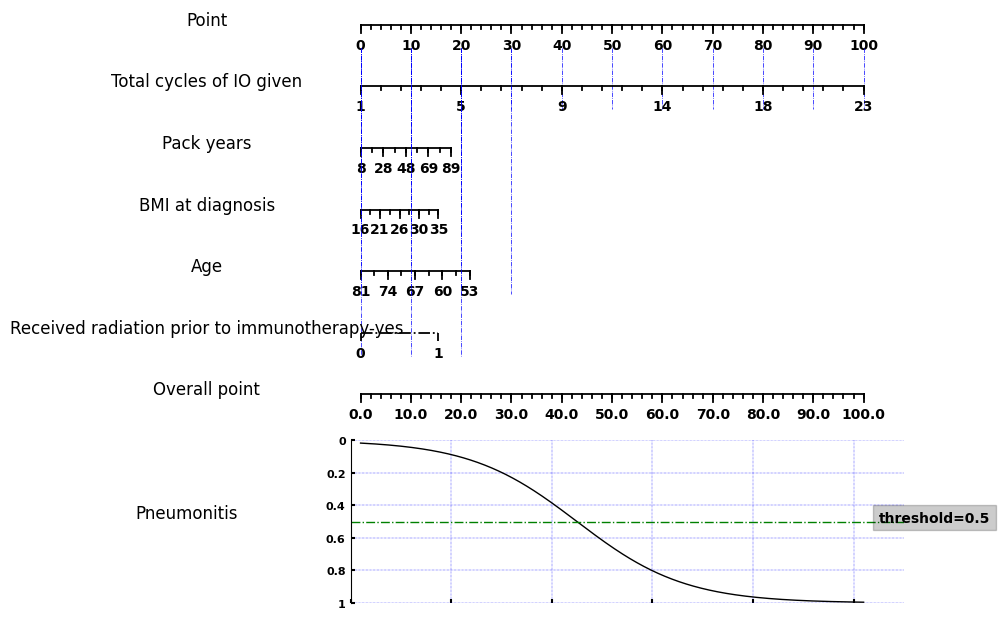

In [54]:
import simpleNomo
model = clf_
model_path = './model.xlsx'
dic=[{'feature':'intercept','coef':model.intercept_[0]},{'feature':'threshold','coef':0.5}]
for i,fea in enumerate(model.feature_names_in_):
    row = {'feature':fea.replace('_','-'),\
           'coef':model.coef_[0][i],\
           'min':X_train_.describe(percentiles=[0.05,0.95]).iloc[4,i],\
           'max':X_train_.describe(percentiles=[0.05,0.95]).iloc[6,i]
          }
    if X_train_.describe(percentiles=[0.05,0.95]).iloc[5,i]==0:
        row['type']='nominal'
    else:
        row['type']='continuous'
    dic.append(row)
nomogram = pd.DataFrame.from_dict(dic) 
nomogram['position']=None
nomogram.to_excel(model_path, index=False)
nomo = simpleNomo.nomogram(path=model_path,result_title="Pneumonitis")

### 1.4 Pycaret 

In [55]:
# import pycaret regression and init setup
from pycaret.classification import *
s = setup(X_train, target=y_train, fold=5, index=False,train_size=0.8,session_id =random_state,preprocess=False)

,Description,Value
0,Session id,2
1,Target,target
2,Target type,Binary
3,Original data shape,"(70, 21)"
4,Transformed data shape,"(70, 21)"
5,Transformed train set shape,"(56, 21)"
6,Transformed test set shape,"(14, 21)"
7,Numeric features,20


In [56]:
best_3=compare_models(n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8924,0.0000,0.8810,0.9464,0.9091,0.7732,0.7848,0.6300
nb,Naive Bayes,0.8197,0.8476,0.7667,0.9417,0.8345,0.6443,0.6760,0.6340
ada,Ada Boost Classifier,0.8197,0.8648,0.8238,0.8850,0.8464,0.6249,0.6389,0.0660
gbc,Gradient Boosting Classifier,0.8015,0.8286,0.7667,0.9250,0.8194,0.6010,0.6397,0.0960
lr,Logistic Regression,0.7848,0.8738,0.7667,0.8964,0.8167,0.5490,0.5703,1.2140
dt,Decision Tree Classifier,0.7833,0.7669,0.8238,0.8345,0.8252,0.5351,0.5437,0.5440
rf,Random Forest Classifier,0.7833,0.8338,0.7667,0.8845,0.8083,0.5617,0.5892,0.7820
knn,K Neighbors Classifier,0.7667,0.8040,0.7048,0.8914,0.7827,0.5393,0.5593,0.5980
ridge,Ridge Classifier,0.7667,0.0000,0.7619,0.8457,0.7978,0.5165,0.5271,0.5480
et,Extra Trees Classifier,0.7667,0.7910,0.7952,0.8317,0.8050,0.5140,0.5339,0.2040


Processing:   0%|          | 0/64 [00:00<?, ?it/s]

In [57]:
for clfmodel in best_3:
    print(clfmodel)
    ml = create_model(clfmodel)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=2, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.0000,0.8571,1.0000,0.9231,0.8333,0.8452
1,0.9091,0.0000,0.8571,1.0000,0.9231,0.8136,0.8281
2,0.9091,0.0000,1.0000,0.8750,0.9333,0.7925,0.8101
3,0.8182,0.0000,0.8571,0.8571,0.8571,0.6071,0.6071
4,0.9091,0.0000,0.8333,1.0000,0.9091,0.8197,0.8333
Mean,0.8924,0.0000,0.8810,0.9464,0.9091,0.7732,0.7848
Std,0.0372,0.0000,0.0602,0.0659,0.0271,0.0841,0.0895


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.8714,1.0000,0.8750,0.9333,0.8235,0.8367
1,0.8182,0.8571,0.7143,1.0000,0.8333,0.6452,0.6901
2,0.7273,0.8214,0.7143,0.8333,0.7692,0.4407,0.4485
3,0.7273,0.8214,0.5714,1.0000,0.7273,0.4923,0.5714
4,0.9091,0.8667,0.8333,1.0000,0.9091,0.8197,0.8333
Mean,0.8197,0.8476,0.7667,0.9417,0.8345,0.6443,0.6760
Std,0.0830,0.0219,0.1432,0.0726,0.0789,0.1597,0.1506


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.8857,1.0000,0.8750,0.9333,0.8235,0.8367
1,0.7273,0.7500,0.8571,0.7500,0.8000,0.3774,0.3858
2,0.9091,0.9643,0.8571,1.0000,0.9231,0.8136,0.8281
3,0.6364,0.8571,0.5714,0.8000,0.6667,0.2903,0.3105
4,0.9091,0.8667,0.8333,1.0000,0.9091,0.8197,0.8333
Mean,0.8197,0.8648,0.8238,0.8850,0.8464,0.6249,0.6389
Std,0.1162,0.0687,0.1393,0.1020,0.1018,0.2392,0.2386


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9714,1.0000,0.8750,0.9333,0.8235,0.8367
1,0.7273,0.6071,0.8571,0.7500,0.8000,0.3774,0.3858
2,0.7273,0.8571,0.5714,1.0000,0.7273,0.4923,0.5714
3,0.7273,0.8571,0.5714,1.0000,0.7273,0.4923,0.5714
4,0.9091,0.8500,0.8333,1.0000,0.9091,0.8197,0.8333
Mean,0.8015,0.8286,0.7667,0.9250,0.8194,0.6010,0.6397
Std,0.0910,0.1196,0.1693,0.1000,0.0876,0.1849,0.1733


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
# lr = create_model('lr',fold=10)
lr_update = create_model('lr',fold=5,penalty='l1',solver='liblinear')
tuned_lr = tune_model(lr_update)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9714,0.8571,0.8571,0.8571,0.6571,0.6571
1,0.6364,0.7500,0.7143,0.7143,0.7143,0.2143,0.2143
2,0.7273,0.9286,0.5714,1.0000,0.7273,0.4923,0.5714
3,0.8182,0.8571,0.7143,1.0000,0.8333,0.6452,0.6901
4,0.9091,0.9333,0.8333,1.0000,0.9091,0.8197,0.8333
Mean,0.7848,0.8881,0.7381,0.9143,0.8082,0.5657,0.5933
Std,0.0941,0.0783,0.1021,0.1143,0.0756,0.2040,0.2075


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9643,1.0000,0.8750,0.9333,0.7925,0.8101
2,0.7273,1.0000,0.5714,1.0000,0.7273,0.4923,0.5714
3,0.8182,0.8571,0.7143,1.0000,0.8333,0.6452,0.6901
4,0.8182,0.9333,0.8333,0.8333,0.8333,0.6333,0.6333
Mean,0.8545,0.9510,0.8238,0.9417,0.8655,0.7127,0.7410
Std,0.0927,0.0531,0.1661,0.0726,0.0937,0.1722,0.1515


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [59]:
# predict on test set
holdout_pred = predict_model(tuned_lr,data = X_test)

In [60]:
holdout_pred

,BMI at diagnosis,Pack years,ECOG PS at the time of immunotherapy,Total cycles of IO given,Age,Choice of immunotherapy_atezolizumab,Choice of immunotherapy_combination,Choice of immunotherapy_durvalumab,Choice of immunotherapy_lenvatinib,Choice of immunotherapy_nivolumab,...,Baseline oxygen dependence_no,Baseline oxygen dependence_yes,IO given concurrently with chemotherapy_no,IO given concurrently with chemotherapy_yes,Received surgery prior to immunotherapy_no,Received surgery prior to immunotherapy_yes,Received radiation prior to immunotherapy_no,Received radiation prior to immunotherapy_yes,prediction_label,prediction_score
0,25.200001,20.0,2,24.0,77,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,1.0000
1,22.629999,28.0,0,14.0,65,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,1.0000
2,30.500000,20.0,2,2.0,61,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,0.9056
3,24.299999,20.0,1,4.0,59,0,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0.9974
4,21.000000,34.0,1,2.0,77,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0.9960
5,28.500000,22.0,2,1.0,66,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0.9948
6,5.000000,32.0,2,2.0,62,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0.9973
7,35.200001,26.0,1,1.0,62,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0.9323
8,42.700001,10.0,1,11.0,39,0,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0.9997
9,29.799999,90.0,1,7.0,67,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0.9962


In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(holdout_pred['prediction_label'], y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.78      1.00      0.88         7

    accuracy                           0.88        17
   macro avg       0.89      0.90      0.88        17
weighted avg       0.91      0.88      0.88        17



### 1.4.1 Feature selection by pycaret

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=2, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


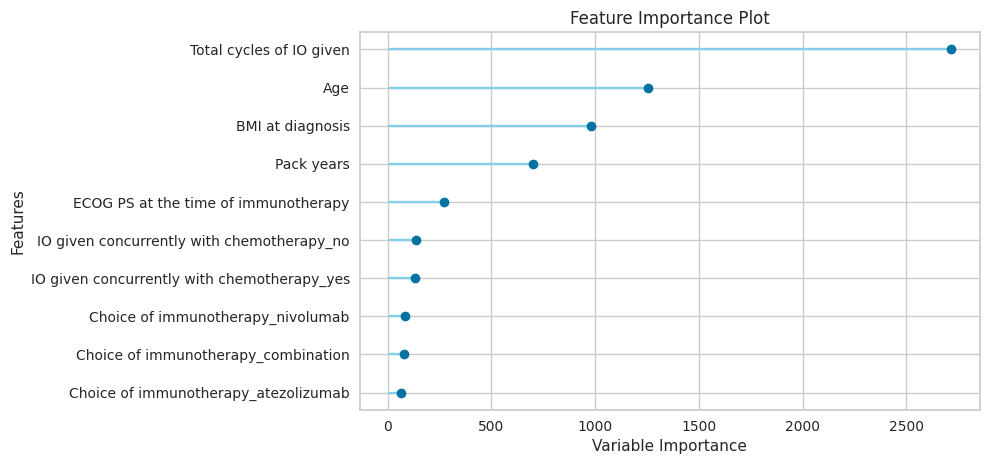

GaussianNB(priors=None, var_smoothing=1e-09)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2)


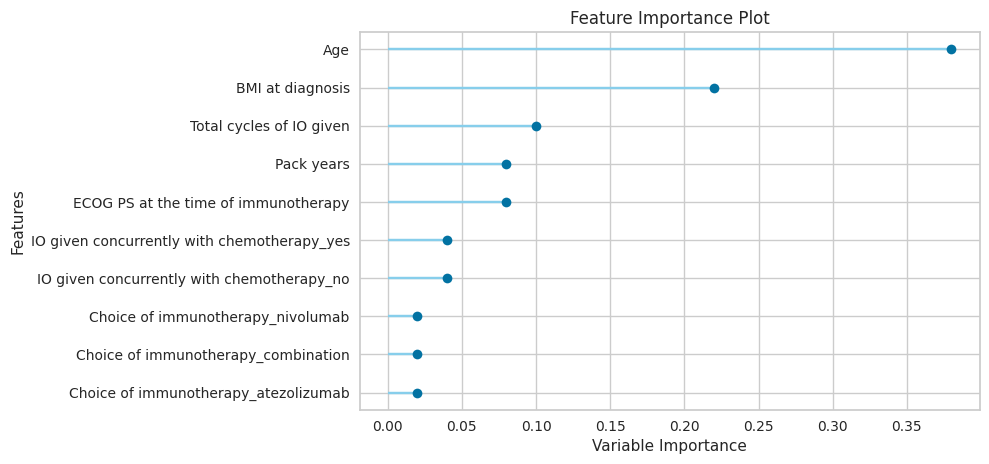

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=2, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


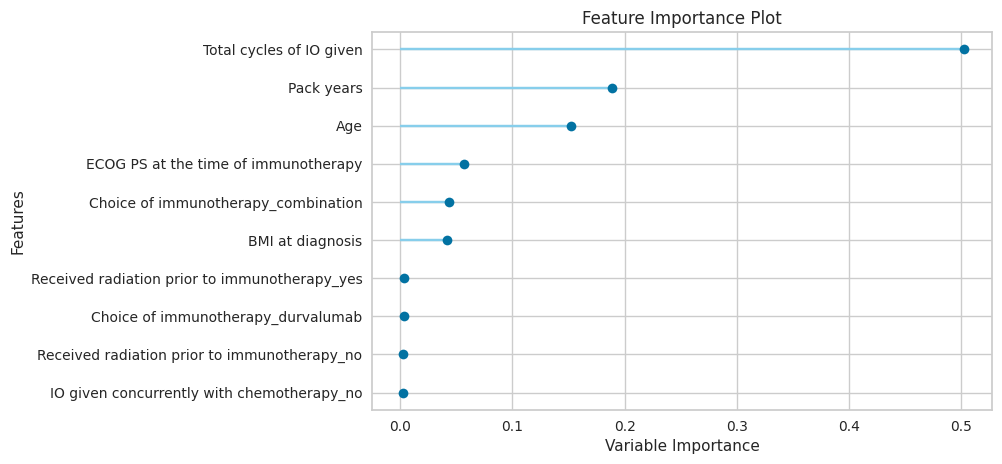

In [62]:
# plot feature importance
for best in best_3:
    try:
        print(best)
        plot_model(best, plot = 'feature')
    except:
        continue        

In [63]:
# interpret summary model
for best in best_3:
    try:
        print(best)
        interpret_model(best, plot = 'summary')
    except:
        continue     

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=2, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
GaussianNB(priors=None, var_smoothing=1e-09)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n

### 1.4.2 Pycaret with selected features

In [64]:
s = setup(X_train, target=y_train, fold=5, index=False,train_size=0.8,session_id =random_state,preprocess=False, feature_selection=True )
best_3=compare_models(n_select=4)

,Description,Value
0,Session id,2
1,Target,target
2,Target type,Binary
3,Original data shape,"(70, 21)"
4,Transformed data shape,"(70, 21)"
5,Transformed train set shape,"(56, 21)"
6,Transformed test set shape,"(14, 21)"
7,Numeric features,20


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.8924,0.0000,0.8810,0.9464,0.9091,0.7732,0.7848,0.0200
nb,Naive Bayes,0.8197,0.8476,0.7667,0.9417,0.8345,0.6443,0.6760,0.0220
ada,Ada Boost Classifier,0.8197,0.8648,0.8238,0.8850,0.8464,0.6249,0.6389,0.0640
gbc,Gradient Boosting Classifier,0.8015,0.8286,0.7667,0.9250,0.8194,0.6010,0.6397,0.0760
lr,Logistic Regression,0.7848,0.8738,0.7667,0.8964,0.8167,0.5490,0.5703,0.0380
dt,Decision Tree Classifier,0.7833,0.7669,0.8238,0.8345,0.8252,0.5351,0.5437,0.0220
rf,Random Forest Classifier,0.7833,0.8338,0.7667,0.8845,0.8083,0.5617,0.5892,0.1220
knn,K Neighbors Classifier,0.7667,0.8040,0.7048,0.8914,0.7827,0.5393,0.5593,0.0660
ridge,Ridge Classifier,0.7667,0.0000,0.7619,0.8457,0.7978,0.5165,0.5271,0.0220
et,Extra Trees Classifier,0.7667,0.7910,0.7952,0.8317,0.8050,0.5140,0.5339,0.1200


Processing:   0%|          | 0/64 [00:00<?, ?it/s]

## 2. Radiomics
### 2.1 Data Cleaning

In [65]:
radiomics = pd.read_csv('../radiomics_wavelet_final.csv',index_col=0)
summary = pd.read_csv('../summary/summary.csv')

In [66]:
radiomics.head()

,subject,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,Lungseg_150_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,3.7.16,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",b7dc84b9f89b6fdbe405ec0f049f9333f1398b89,3D,...,2789.860588,0.000451,8.166625,0.263487,70381.09701,26.637709,0.000011,14407.94161,0.175781,0.111432
1,Lungseg_151_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,3.7.16,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",fe00377efedded5a91d181056304633529ca5777,3D,...,2167.965977,0.000726,7.939623,0.252727,158668.21340,70.725868,0.000003,24896.99656,0.107041,0.068917
2,Lungseg_152_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,3.7.16,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",9e7b4b2bfc5a4dd54768bfaca99c8dfca630dd56,3D,...,4632.261239,0.000195,8.444114,0.281068,350428.64460,9.550910,0.000006,25225.22729,0.350297,0.086460
3,Lungseg_153_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,3.7.16,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",b7b92fcf700c2d62397efd34f38ab7286d2c59f3,3D,...,3385.310984,0.000322,7.902066,0.332478,47698.73519,34.736121,0.000004,34717.71877,0.151690,0.064638
4,Lungseg_154_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,3.7.16,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}}",2580f7e72a105be27ea61ce1df1c8c25023f2d49,3D,...,2129.286537,0.000846,8.031046,0.324199,77631.83952,81.007392,0.000003,30706.81495,0.169059,0.056802


In [67]:
summary.head()

,ID,subject,category,patient,descripsion,imagename
0,0,Lung_15_271,pnemonitis1.5,Simmons_Ruby_Ray,Ct_Chest_W_Contrast - 3724,Lungseg_000_0000.nii.gz
1,1,Lung_15_222,pnemonitis1.5,Montgomery_Cindy_B,Ct_Chest_Wo_Contrast - 28733,Lungseg_001_0000.nii.gz
2,2,Lung_15_243,pnemonitis1.5,Sheff_Medgar_Tyrone,Ct_Chest_W_Contrast - 33451,Lungseg_002_0000.nii.gz
3,3,Lung_15_220,pnemonitis1.5,Shore_Wiley_Walter,Ct_Chest_Abdomen_Pelvis_W_Contrast_(Trauma) - ...,Lungseg_003_0000.nii.gz
4,5,Lung_15_264,pnemonitis1.5,Price_Cynthia_Lynn,Ct_Chest_Wo_Contrast - 27101,Lungseg_005_0000.nii.gz


In [184]:
summary

,ID,subject,category,patient,descripsion,imagename
0,0,Lung_15_271,pnemonitis1.5,Simmons_Ruby_Ray,Ct_Chest_W_Contrast - 3724,Lungseg_000_0000.nii.gz
1,1,Lung_15_222,pnemonitis1.5,Montgomery_Cindy_B,Ct_Chest_Wo_Contrast - 28733,Lungseg_001_0000.nii.gz
2,2,Lung_15_243,pnemonitis1.5,Sheff_Medgar_Tyrone,Ct_Chest_W_Contrast - 33451,Lungseg_002_0000.nii.gz
3,3,Lung_15_220,pnemonitis1.5,Shore_Wiley_Walter,Ct_Chest_Abdomen_Pelvis_W_Contrast_(Trauma) - ...,Lungseg_003_0000.nii.gz
4,5,Lung_15_264,pnemonitis1.5,Price_Cynthia_Lynn,Ct_Chest_Wo_Contrast - 27101,Lungseg_005_0000.nii.gz
...,...,...,...,...,...,...
176,186,Lung_15_224,1.5mm normals immunotherapy,Tullock_Kathy_Hutchins,Ct_Chest_Wo_Iv_Contrast - 722708797,Lungseg_186_0000.nii.gz
177,187,Lung_15_243,1.5mm normals immunotherapy,Warren_Natalie_Yvonne,Ct_Chest_W_Iv_Contrast - 36163,Lungseg_187_0000.nii.gz
178,188,Lung_15_232,1.5mm normals immunotherapy,Washington_Leonard_Charles,Thorax_Chest_Wo_(Adult) - 557188790,Lungseg_188_0000.nii.gz
179,189,Lung_Axial_15_mm_5,1.5mm normals immunotherapy,White_Robert_Littrell__Sr,Cta_Chest_For_Pe - 556964729,Lungseg_189_0000.nii.gz


In [68]:
radiomics_df= summary.merge(radiomics,left_on='imagename',right_on='subject')

In [69]:
radiomics_df=radiomics_df[(radiomics_df['category']=='1.5mm normals immunotherapy')|(radiomics_df['category']=='pre1.5')]
radiomics_df['target']=(radiomics_df['category']=='pre1.5').astype('int')

In [70]:
radiomics_df=radiomics_df.drop(['original_firstorder_Maximum'],axis=1)

In [71]:
radiomics_df=radiomics_df.set_index('imagename')

In [72]:
radiomics_df.head()

,ID,subject_x,category,patient,descripsion,subject_y,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,...,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength,target
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_046_0000.nii.gz,46,Lung_15_301,pre1.5,Hutchins_Edgar_Stevenson,Ct_Chest_Abdomen_Pelvi - 774,Lungseg_046_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,...,0.000411,8.070771,0.419501,18145.233860,51.890364,0.000003,42781.41417,0.226397,0.044947,1
Lungseg_047_0000.nii.gz,47,Lung_15_284,pre1.5,Young_Barbara_Jo,Ct_Chest_Wo_Contrast - 2907,Lungseg_047_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,...,0.000369,7.924897,0.360401,21963.781590,40.237836,0.000003,47274.12512,0.166558,0.069557,1
Lungseg_048_0000.nii.gz,48,Lung_15_276,pre1.5,Cobb_Robert_Lee,Ct_Chest_Abdomen_Pelvi - 5970,Lungseg_048_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,...,0.000312,8.179854,0.418257,7128.623943,29.785122,0.000005,45008.93863,0.272180,0.070449,1
Lungseg_049_0000.nii.gz,49,Lung_15_310,pre1.5,Finney_Jerry_Lee,ChestAbdPelvis - 28483,Lungseg_049_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,...,0.000306,8.141825,0.344659,11929.485650,27.644482,0.000005,30281.29226,0.140882,0.075793,1
Lungseg_050_0000.nii.gz,50,Lung_15_348,pre1.5,Loggins_Ronnie_Joe,Thorax_Xl_Chest_With_(Adult) - 417408257,Lungseg_050_0000.nii.gz,v3.0.1,1.21.6,2.2.1,1.3.0,...,0.000399,8.209104,0.334728,44369.907030,61.570790,0.000002,39652.00974,0.239965,0.048251,1


In [73]:
radiomics_feature= list(radiomics_df.columns[28:])

In [74]:
radiomics_feature.append('patient')

In [75]:
radiomics_data = radiomics_df[radiomics_feature]

In [76]:
radiomics_data.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength,target,patient
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_046_0000.nii.gz,0.714738,0.518044,166.353497,321.118546,323.024767,261.007663,306.008170,323.323368,5282816.667,229.515550,...,8.070771,0.419501,18145.233860,51.890364,0.000003,42781.41417,0.226397,0.044947,1,Hutchins_Edgar_Stevenson
Lungseg_047_0000.nii.gz,0.736319,0.547184,155.241386,283.709611,291.605898,257.287777,275.753513,296.912445,3628416.958,208.900847,...,7.924897,0.360401,21963.781590,40.237836,0.000003,47274.12512,0.166558,0.069557,1,Young_Barbara_Jo
Lungseg_048_0000.nii.gz,0.685866,0.526872,157.978452,299.842290,397.431755,258.503385,273.912395,397.930899,3431515.958,205.651568,...,8.179854,0.418257,7128.623943,29.785122,0.000005,45008.93863,0.272180,0.070449,1,Cobb_Robert_Lee
Lungseg_049_0000.nii.gz,0.674214,0.513900,160.306313,311.940464,315.039680,252.105137,287.020905,321.909925,3627466.333,210.314639,...,8.141825,0.344659,11929.485650,27.644482,0.000005,30281.29226,0.140882,0.075793,1,Finney_Jerry_Lee
Lungseg_050_0000.nii.gz,0.766012,0.556208,194.822462,350.269057,362.823649,338.462701,325.036921,378.027777,6683808.333,268.310339,...,8.209104,0.334728,44369.907030,61.570790,0.000002,39652.00974,0.239965,0.048251,1,Loggins_Ronnie_Joe


In [77]:
radiodict={}
for column in radiomics_data.columns[:-2]:
    radiodict[column]={'min':radiomics_data[column].min(), 'diff':radiomics_data[column].max() - radiomics_data[column].min()}
    radiomics_data[column] = (radiomics_data[column] - radiomics_data[column].min()) / (radiomics_data[column].max() - radiomics_data[column].min())

In [78]:
radiomics_data.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength,target,patient
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_046_0000.nii.gz,0.327512,0.309344,0.411049,0.624206,0.449242,0.444497,0.618386,0.421439,0.562998,0.563501,...,0.356923,0.711814,0.032933,0.458965,0.144610,0.572474,0.394068,0.074657,1,Hutchins_Edgar_Stevenson
Lungseg_047_0000.nii.gz,0.381641,0.400989,0.290339,0.361230,0.275035,0.418463,0.425862,0.274902,0.285013,0.395044,...,0.105659,0.528463,0.039879,0.332650,0.149869,0.654111,0.274146,0.321317,1,Young_Barbara_Jo
Lungseg_048_0000.nii.gz,0.255098,0.337108,0.320072,0.474639,0.861801,0.426970,0.414146,0.835390,0.251928,0.368492,...,0.544817,0.707957,0.012893,0.219342,0.303243,0.612950,0.485820,0.330267,1,Cobb_Robert_Lee
Lungseg_049_0000.nii.gz,0.225875,0.296313,0.345359,0.559686,0.404967,0.382191,0.497562,0.413597,0.284853,0.406597,...,0.479312,0.479624,0.021626,0.196137,0.313760,0.345332,0.222690,0.383821,1,Finney_Jerry_Lee
Lungseg_050_0000.nii.gz,0.456114,0.429369,0.720305,0.829127,0.669912,0.986587,0.739474,0.724960,0.798404,0.880520,...,0.595201,0.448814,0.080638,0.563903,0.077125,0.515609,0.421257,0.107770,1,Loggins_Ronnie_Joe


In [79]:
len(radiomics_data)

92

### 2.2 Logit Regression

In [80]:
y = radiomics_data['target']
X =radiomics_data.drop(['target','patient'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [81]:
y_train.value_counts()

1    38
0    35
Name: target, dtype: int64

In [82]:
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [83]:
lr.score(X_test, y_test)

0.3684210526315789

### 2.3 Chi Square

In [84]:
z= feature_selection.chi2(X, y)
fs = []
for idx, x in enumerate(X.columns):
    fs.append({'name':x,'chi2':z[0][idx], 'p-val':z[1][idx]})
fs.sort(key=lambda x:-x['chi2'])

In [85]:
feature_size = 400

In [86]:
fs[:feature_size]

[{'name': 'wavelet-LLH_glszm_ZoneVariance',
  'chi2': 1.12689023752693,
  'p-val': 0.2884396301531694},
 {'name': 'wavelet-LLH_glszm_LargeAreaEmphasis',
  'chi2': 1.1268547228096568,
  'p-val': 0.2884472278820338},
 {'name': 'wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis',
  'chi2': 0.8970094469206878,
  'p-val': 0.3435848559589978},
 {'name': 'wavelet-HHH_glszm_LargeAreaHighGrayLevelEmphasis',
  'chi2': 0.8459867417040468,
  'p-val': 0.3576901538738039},
 {'name': 'wavelet-HLH_glszm_LargeAreaHighGrayLevelEmphasis',
  'chi2': 0.8093934849222282,
  'p-val': 0.3682996278236056},
 {'name': 'wavelet-LLH_glcm_JointEnergy',
  'chi2': 0.7645889469473772,
  'p-val': 0.38189622785736965},
 {'name': 'wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis',
  'chi2': 0.7262634140511296,
  'p-val': 0.39409704925426414},
 {'name': 'wavelet-HLH_ngtdm_Contrast',
  'chi2': 0.7236488796809333,
  'p-val': 0.3949496125243578},
 {'name': 'wavelet-HLH_gldm_SmallDependenceLowGrayLevelEmphasis',
  'chi2': 0.69960

In [87]:
radio_fs = X[[i['name'] for i in fs[:feature_size]]]

In [88]:
radio_fs

,wavelet-LLH_glszm_ZoneVariance,wavelet-LLH_glszm_LargeAreaEmphasis,wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis,wavelet-HHH_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HLH_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-LLH_glcm_JointEnergy,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet-HLH_ngtdm_Contrast,wavelet-HLH_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLH_gldm_SmallDependenceHighGrayLevelEmphasis,...,original_glszm_SmallAreaEmphasis,wavelet-HHH_glszm_ZoneEntropy,wavelet-LLH_glrlm_GrayLevelNonUniformity,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_glszm_SizeZoneNonUniformityNormalized,wavelet-HHH_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-HHH_glszm_ZoneVariance,wavelet-HHH_glcm_MCC,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis,wavelet-LLL_firstorder_90Percentile
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_046_0000.nii.gz,0.007226,0.007226,0.001149,0.058250,0.034221,0.089229,0.022321,0.197849,0.393614,0.120177,...,0.615676,0.272953,0.407774,0.530434,0.671884,0.378433,0.008598,0.733555,0.022363,0.448022
Lungseg_047_0000.nii.gz,0.009125,0.009124,0.002175,0.027421,0.042024,0.164704,0.017347,0.076031,0.173109,0.062242,...,0.767721,0.311835,0.299832,0.455051,0.669956,0.455207,0.003493,0.784286,0.016591,0.371106
Lungseg_048_0000.nii.gz,0.019175,0.019175,0.005278,0.054368,0.033646,0.311571,0.006213,0.075244,0.322161,0.031748,...,0.646399,0.382648,0.270075,0.688411,0.706926,0.255642,0.011399,0.679731,0.025359,0.574133
Lungseg_049_0000.nii.gz,0.239477,0.239506,0.292953,0.187846,0.252766,0.896456,0.009624,0.150461,0.168513,0.000000,...,0.338489,0.492010,0.428293,0.459737,0.470933,0.022945,0.141536,0.365550,0.052740,0.526364
Lungseg_050_0000.nii.gz,0.063858,0.063855,0.020954,0.179670,0.142475,0.576634,0.046081,0.026932,0.126166,0.018780,...,0.598811,0.395333,0.885046,0.439965,0.474719,0.195262,0.045647,0.710313,0.027782,0.591760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lungseg_186_0000.nii.gz,0.120957,0.120951,0.043964,0.109505,0.172452,0.685066,0.228755,0.051351,0.175900,0.014285,...,0.713091,0.105407,0.636861,0.216664,0.593143,0.168687,0.034853,0.301268,0.009034,0.165971
Lungseg_187_0000.nii.gz,0.017748,0.017747,0.004452,0.043661,0.045927,0.329281,0.008986,0.065964,0.204387,0.038989,...,0.685100,0.369772,0.286834,0.462731,0.703503,0.317475,0.007646,0.694973,0.023034,0.505156
Lungseg_188_0000.nii.gz,0.051335,0.051334,0.018922,0.111113,0.073459,0.503486,0.052818,0.030664,0.200292,0.013928,...,0.628201,0.471964,0.437844,0.384873,0.695589,0.311800,0.019312,0.935642,0.056896,0.462057


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


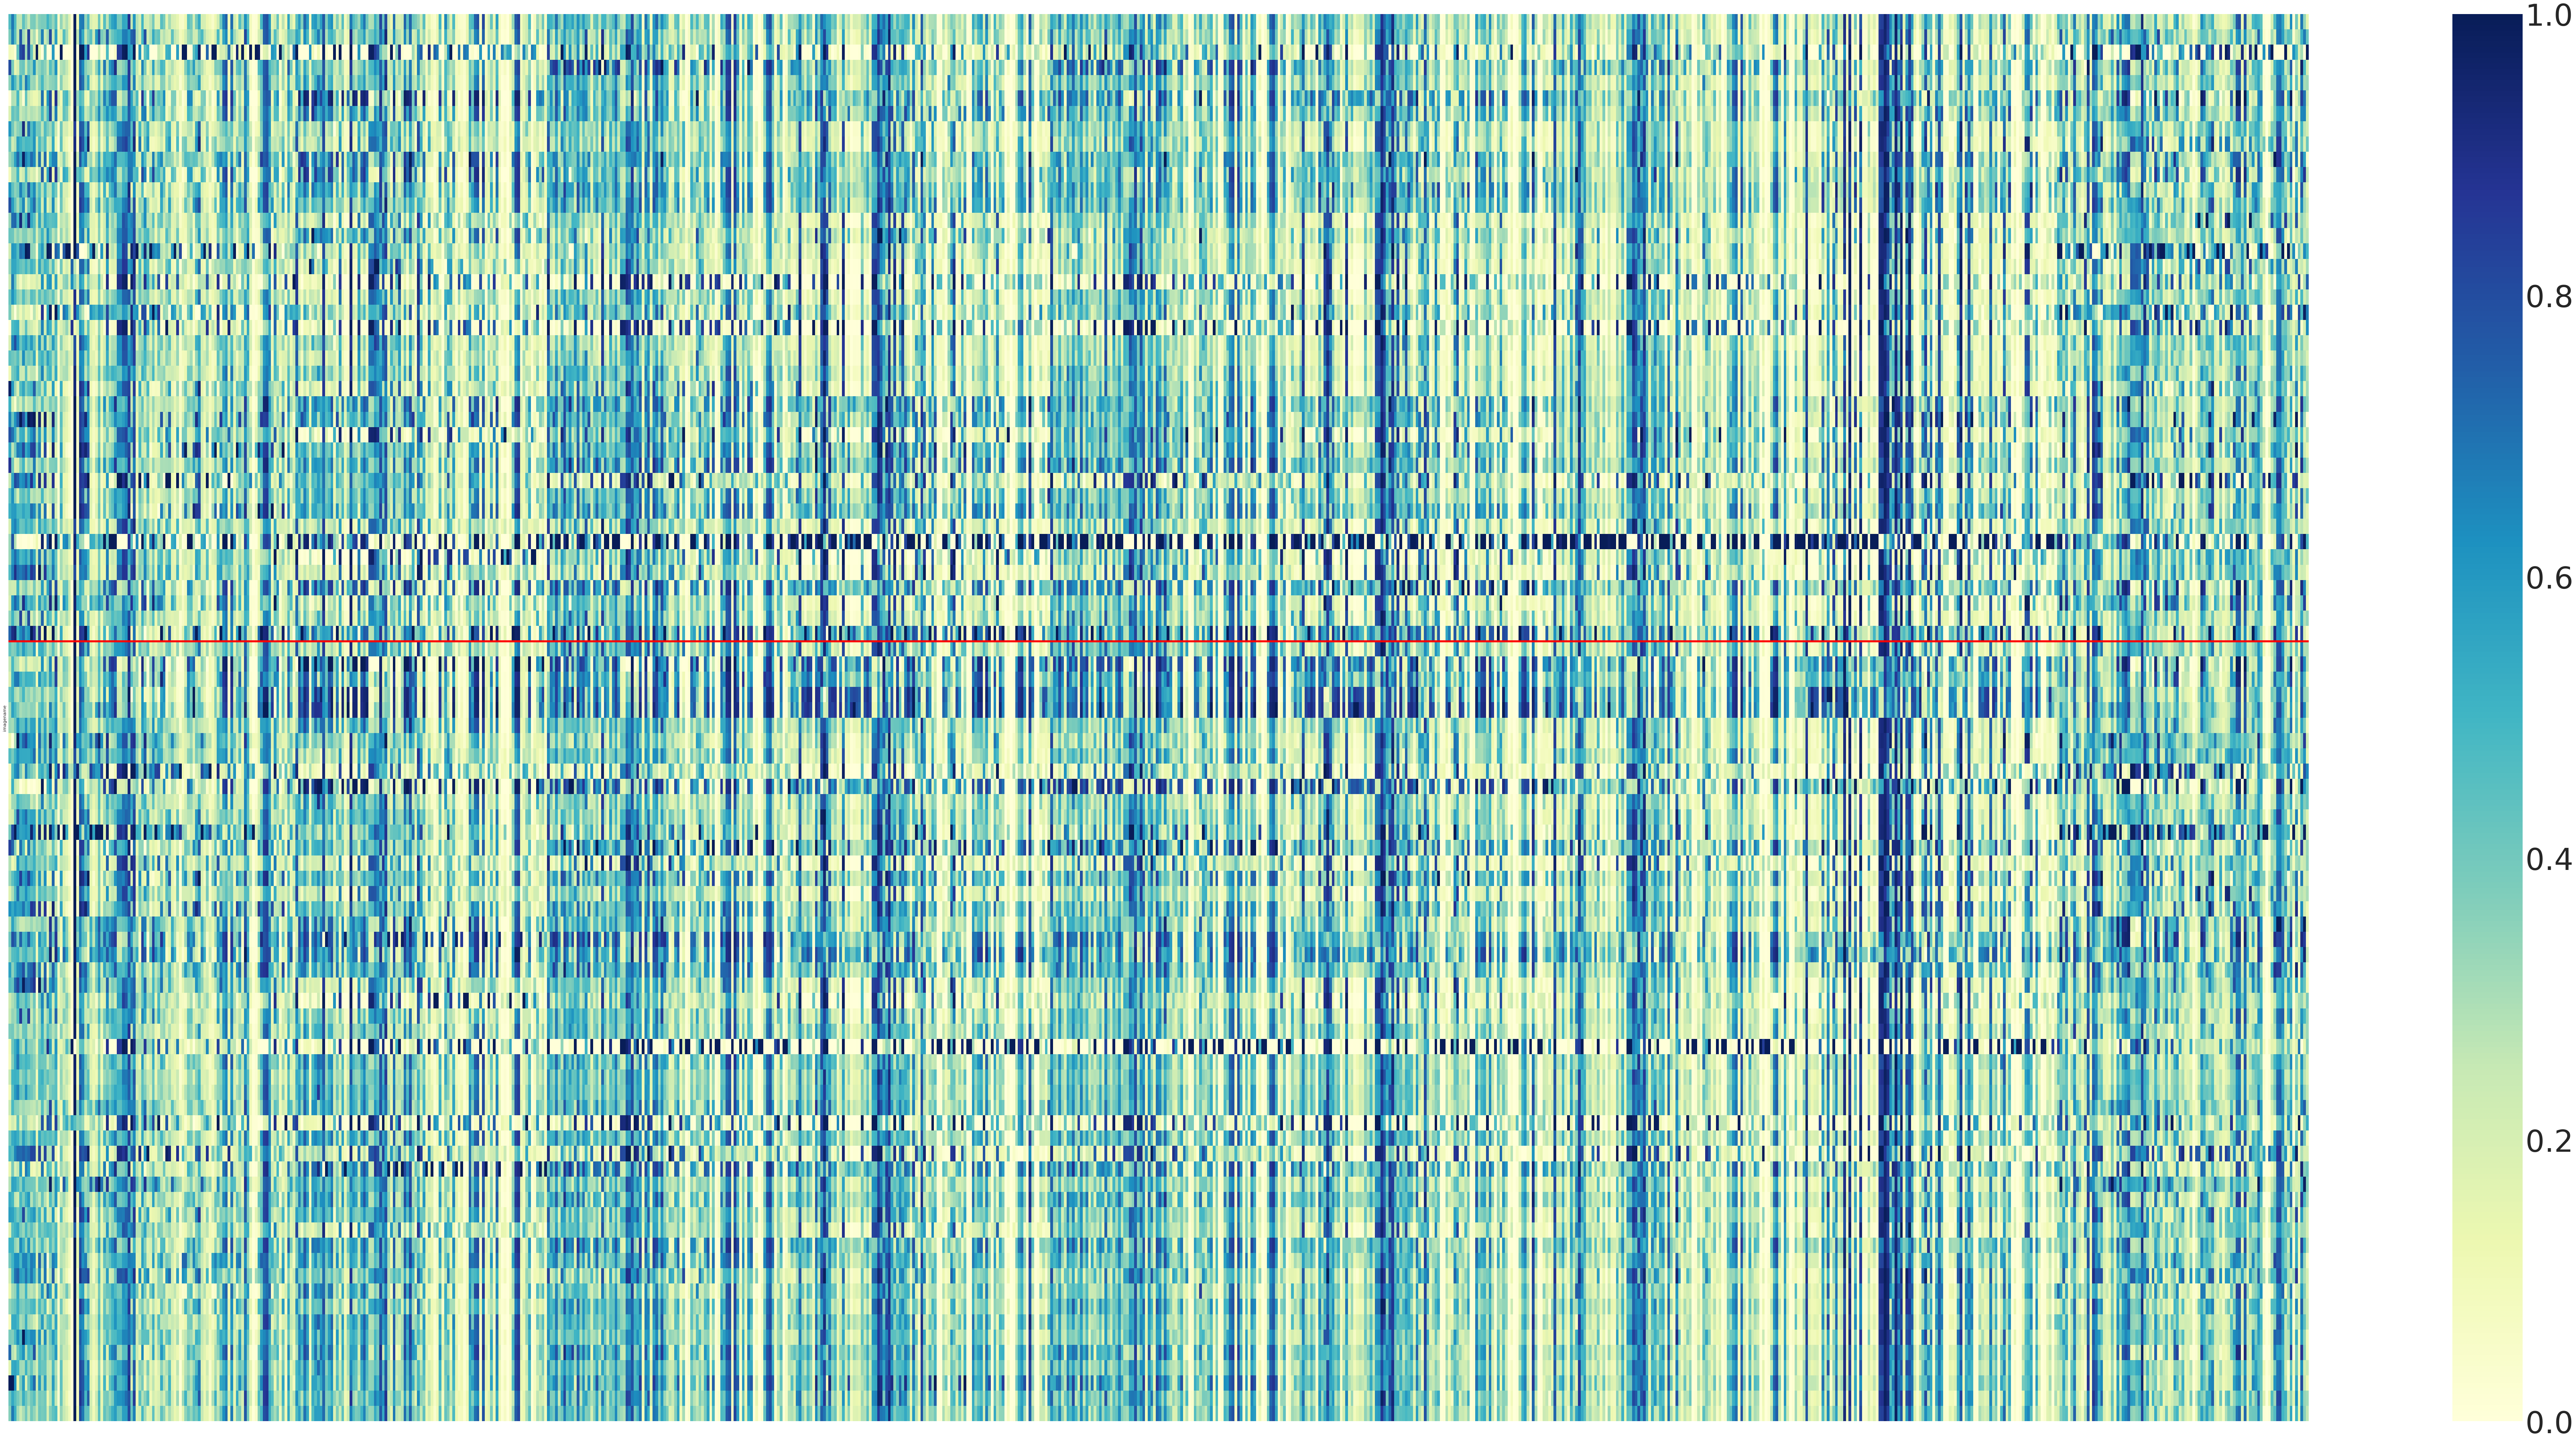

In [89]:
heatmap = radiomics_data.drop(['patient'],axis=1)
# Sort the DataFrame by the specified column
sorted_df = heatmap.sort_values(by='target')
len(sorted_df[sorted_df.target ==0])
hm = sorted_df.drop(['target'],axis=1)
import seaborn as sns
fig, axes = plt.subplots( figsize=(100, 50))  # 2 rows, 1 column

heatmap = sns.heatmap(hm, cmap='YlGnBu',xticklabels='', yticklabels='')
# Access the color bar object from the heatmap
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=75)  # Adjust the font size as needed (e.g., labelsize=10)

# Draw a horizontal line at the specified position (e.g., row index 2)
plt.axhline(y=41, color='red', linewidth=5, linestyle='-')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### 2.3.1 Model with selected features

In [90]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [91]:
X_train_= X_train[[i['name'] for i in fs[:feature_size]]]
X_test_= X_test[[i['name'] for i in fs[:feature_size]]]
clf_ = LogisticRegression(penalty='l1',random_state=10,solver='liblinear').fit(X_train_, y_train)
clf_.score(X_test_, y_test)

0.47368421052631576

In [92]:
X_train_

,wavelet-LLH_glszm_ZoneVariance,wavelet-LLH_glszm_LargeAreaEmphasis,wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis,wavelet-HHH_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HLH_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-LLH_glcm_JointEnergy,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet-HLH_ngtdm_Contrast,wavelet-HLH_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLH_gldm_SmallDependenceHighGrayLevelEmphasis,...,original_glszm_SmallAreaEmphasis,wavelet-HHH_glszm_ZoneEntropy,wavelet-LLH_glrlm_GrayLevelNonUniformity,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_glszm_SizeZoneNonUniformityNormalized,wavelet-HHH_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-HHH_glszm_ZoneVariance,wavelet-HHH_glcm_MCC,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis,wavelet-LLL_firstorder_90Percentile
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_057_0000.nii.gz,0.039183,0.039181,0.004745,0.138773,0.329787,0.299555,0.212616,0.017619,0.000000,0.109396,...,0.910556,0.658685,0.617663,0.293923,0.764871,0.830184,0.009279,0.838002,0.009332,0.141597
Lungseg_074_0000.nii.gz,0.005895,0.005894,0.000887,0.038919,0.047674,0.126083,0.012481,0.105641,0.144802,0.132046,...,0.868067,0.614836,0.245746,0.522245,0.768351,0.650531,0.003282,0.737798,0.018733,0.484977
Lungseg_073_0000.nii.gz,0.022026,0.022025,0.002868,0.146700,0.104862,0.132973,0.045563,0.131925,0.289407,0.126462,...,0.688342,0.367607,0.507147,0.489328,0.711594,0.436666,0.018466,0.790591,0.029070,0.404925
Lungseg_051_0000.nii.gz,0.013377,0.013376,0.001548,0.047025,0.053346,0.191754,0.036989,0.194783,0.270462,0.145243,...,0.892462,0.590971,0.591783,0.424669,0.845161,0.566016,0.004501,0.641422,0.010724,0.378329
Lungseg_164_0000.nii.gz,0.030396,0.030395,0.006278,0.051434,0.090174,0.269573,0.000639,0.074430,0.190471,0.058242,...,0.786453,0.626932,0.376696,0.589460,0.610472,0.591714,0.004921,0.559859,0.005080,0.435944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lungseg_089_0000.nii.gz,0.024335,0.024334,0.004654,0.073473,0.090165,0.271092,0.134785,0.058009,0.164050,0.055461,...,0.685663,0.000000,0.611725,0.402480,0.658955,0.283857,0.015363,0.711057,0.046178,0.972363
Lungseg_068_0000.nii.gz,0.017042,0.017041,0.003038,0.058176,0.092881,0.281740,0.128629,0.029241,0.069720,0.068389,...,0.883407,0.479606,0.418211,0.327091,0.819074,0.582302,0.005563,0.791758,0.015078,0.283454
Lungseg_171_0000.nii.gz,0.046955,0.046954,0.009573,0.132906,0.190413,0.422047,0.117095,0.012807,0.028772,0.033265,...,0.662198,0.326845,0.575315,0.296999,0.698682,0.209972,0.033805,0.753062,0.048901,0.339033


### 2.3.2 Nomogram

findfont: Font family ['Songti Sc'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Songti Sc'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


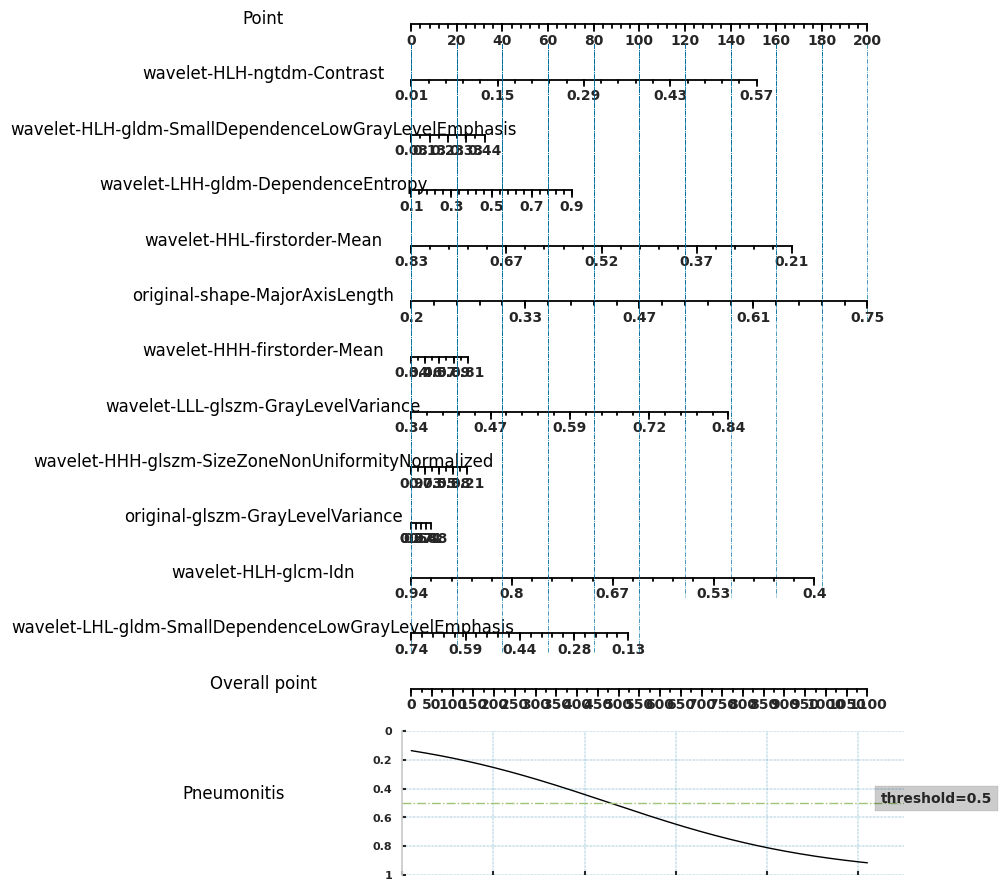

In [93]:
model = clf_
model_path = './model.xlsx'
dic=[{'feature':'intercept','coef':model.intercept_[0]},{'feature':'threshold','coef':0.5}]
for i,fea in enumerate(model.feature_names_in_):
    if not model.coef_[0][i]==0:
        row = {'feature':fea.replace('_','-'),\
               'coef':model.coef_[0][i],\
               'min':X_train_.describe(percentiles=[0.05,0.95]).iloc[4,i],\
               'max':X_train_.describe(percentiles=[0.05,0.95]).iloc[6,i]
              }
        if X_train_.describe(percentiles=[0.05,0.95]).iloc[5,i]==0:
            row['type']='nominal'
        else:
            row['type']='continuous'
        dic.append(row)
nomogram = pd.DataFrame.from_dict(dic) 
nomogram['position']=None
nomogram.to_excel(model_path, index=False)
nomo = simpleNomo.nomogram(path=model_path,result_title="Pneumonitis",total_point=200)

### 2.4 PyCaret

In [94]:
X_train

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_057_0000.nii.gz,0.335022,0.441891,0.531699,0.593747,0.841936,0.578844,0.641137,0.822812,0.627772,0.545945,...,0.505986,0.387789,0.003228,0.284276,0.375056,0.709233,0.035933,0.685332,0.195273,0.239864
Lungseg_074_0000.nii.gz,0.088032,0.532397,0.541483,0.495686,0.304374,0.337484,0.524762,0.313614,0.289721,0.220433,...,0.629636,0.249246,0.355255,0.568352,0.024256,0.295545,0.213848,0.634924,0.435903,0.246480
Lungseg_073_0000.nii.gz,0.386095,0.367825,0.481445,0.630875,0.493336,1.000000,0.612012,0.564388,0.639800,0.630515,...,0.582260,0.264853,0.269847,0.573769,0.080316,0.548962,0.088519,0.591973,0.340623,0.098054
Lungseg_051_0000.nii.gz,0.570278,0.352010,0.484079,0.655498,0.671012,0.791409,0.452032,0.703183,0.728521,0.847012,...,0.481519,0.582713,0.244249,0.596494,0.038455,0.952220,0.043821,0.786023,0.470555,0.063553
Lungseg_164_0000.nii.gz,0.801723,0.389769,0.141863,0.197569,0.402211,0.418857,0.243355,0.398634,0.353993,0.611403,...,0.574856,0.237129,0.326297,0.755283,0.002237,0.314186,0.135846,0.963468,0.476836,0.198059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lungseg_089_0000.nii.gz,0.124106,0.000000,0.311646,1.000000,0.579105,0.729132,0.823102,0.617570,0.596792,0.627488,...,0.601088,0.374672,0.542290,0.283867,0.214108,0.293356,0.150745,0.359984,0.851618,0.222618
Lungseg_068_0000.nii.gz,0.413215,0.543367,0.457455,0.391369,0.342561,0.523924,0.411124,0.336221,0.403344,0.450467,...,0.508509,0.532662,0.235479,0.352651,0.164460,0.622415,0.115688,0.579286,0.336204,0.309442
Lungseg_171_0000.nii.gz,0.194756,0.652360,0.795701,0.628529,0.416947,0.524271,0.597773,0.459711,0.595208,0.427932,...,0.454584,0.476886,0.333651,0.340546,0.118772,0.585385,0.144610,0.393400,0.243863,0.252787


In [95]:
s = setup(X, target=y, fold=5, train_size=0.8,session_id =random_state,preprocess=False)

,Description,Value
0,Session id,2
1,Target,target
2,Target type,Binary
3,Original data shape,"(92, 851)"
4,Transformed data shape,"(92, 851)"
5,Transformed train set shape,"(73, 851)"
6,Transformed test set shape,"(19, 851)"
7,Numeric features,850


In [96]:
best_3=compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6162,0.0000,0.6750,0.6343,0.6434,0.2275,0.2373,0.0500
lr,Logistic Regression,0.6019,0.6238,0.7000,0.6230,0.6483,0.1894,0.1978,0.0740
nb,Naive Bayes,0.6019,0.5893,0.7500,0.6101,0.6712,0.1740,0.1865,0.0580
lightgbm,Light Gradient Boosting Machine,0.5771,0.6060,0.6500,0.6094,0.6236,0.1422,0.1468,4.8740
et,Extra Trees Classifier,0.5610,0.5458,0.6000,0.5986,0.5868,0.1101,0.1144,0.2760
dummy,Dummy Classifier,0.5486,0.5000,1.0000,0.5486,0.7083,0.0000,0.0000,0.0500
knn,K Neighbors Classifier,0.5343,0.5690,0.6250,0.5572,0.5704,0.0542,0.0789,0.1020
svm,SVM - Linear Kernel,0.5343,0.0000,0.3500,0.5700,0.3868,0.0957,0.1229,0.0440
qda,Quadratic Discriminant Analysis,0.5343,0.5280,0.5750,0.5861,0.5738,0.0540,0.0526,0.0600
rf,Random Forest Classifier,0.5219,0.5688,0.5750,0.5668,0.5583,0.0329,0.0351,0.2740


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

In [97]:
for clfmodel in best_3:
    print(clfmodel)
    ml = create_model(clfmodel)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.7500,0.6000,0.6667,0.1818,0.1890
1,0.7333,0.0000,0.8750,0.7000,0.7778,0.4545,0.4725
2,0.5333,0.0000,0.5000,0.5714,0.5333,0.0708,0.0714
3,0.7143,0.0000,0.8750,0.7000,0.7778,0.3913,0.4108
4,0.5000,0.0000,0.3750,0.6000,0.4615,0.0392,0.0430
Mean,0.6162,0.0000,0.6750,0.6343,0.6434,0.2275,0.2373
Std,0.0938,0.0000,0.2031,0.0547,0.1279,0.1676,0.1749


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5333,0.7143,0.7500,0.5455,0.6316,0.0367,0.0403
1,0.8000,0.8571,0.8750,0.7778,0.8235,0.5946,0.6001
2,0.5333,0.4643,0.6250,0.5556,0.5882,0.0541,0.0546
3,0.6429,0.6250,0.8750,0.6364,0.7368,0.2222,0.2513
4,0.5000,0.4583,0.3750,0.6000,0.4615,0.0392,0.0430
Mean,0.6019,0.6238,0.7000,0.6230,0.6483,0.1894,0.1978
Std,0.1102,0.1520,0.1871,0.0839,0.1243,0.2142,0.2163


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7232,0.8750,0.6364,0.7368,0.3119,0.3425
1,0.6667,0.6607,0.7500,0.6667,0.7059,0.3243,0.3273
2,0.5333,0.5000,0.6250,0.5556,0.5882,0.0541,0.0546
3,0.6429,0.5833,0.8750,0.6364,0.7368,0.2222,0.2513
4,0.5000,0.4792,0.6250,0.5556,0.5882,-0.0426,-0.0430
Mean,0.6019,0.5893,0.7500,0.6101,0.6712,0.1740,0.1865
Std,0.0709,0.0929,0.1118,0.0459,0.0687,0.1451,0.1539


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [98]:
# lr = create_model('lr',fold=10)
lr_radio = create_model('lr',fold=5,penalty='l1',solver='liblinear')
tuned_lr_radio= tune_model(lr_radio)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5333,0.5536,0.8750,0.5385,0.6667,0.0187,0.0262
1,0.6000,0.6786,0.8750,0.5833,0.7000,0.1667,0.2004
2,0.5333,0.5357,0.6250,0.5556,0.5882,0.0541,0.0546
3,0.6429,0.5833,0.8750,0.6364,0.7368,0.2222,0.2513
4,0.5000,0.4792,0.5000,0.5714,0.5333,0.0000,0.0000
Mean,0.5619,0.5661,0.7500,0.5770,0.6450,0.0923,0.1065
Std,0.0519,0.0657,0.1581,0.0333,0.0743,0.0870,0.1003


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5333,0.6429,0.7500,0.5455,0.6316,0.0367,0.0403
1,0.9333,0.9286,1.0000,0.8889,0.9412,0.8649,0.8729
2,0.6000,0.5357,0.6250,0.6250,0.6250,0.1964,0.1964
3,0.7143,0.7083,0.8750,0.7000,0.7778,0.3913,0.4108
4,0.6429,0.5417,0.5000,0.8000,0.6154,0.3137,0.3443
Mean,0.6848,0.6714,0.7500,0.7119,0.7182,0.3606,0.3729
Std,0.1375,0.1439,0.1768,0.1221,0.1265,0.2790,0.2807


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [99]:
# predict on test set
holdout_pred = predict_model(tuned_lr_radio,data = X_test)

In [100]:
print(classification_report(holdout_pred['prediction_label'], y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.92      0.92      0.92        13

    accuracy                           0.89        19
   macro avg       0.88      0.88      0.88        19
weighted avg       0.89      0.89      0.89        19



### 2.4.1 Feature selection by Pycaret

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)


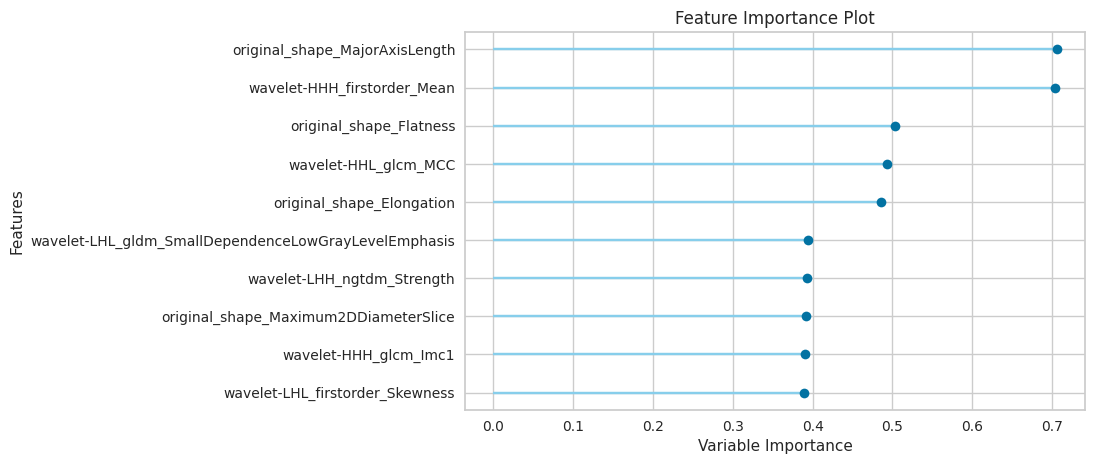

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


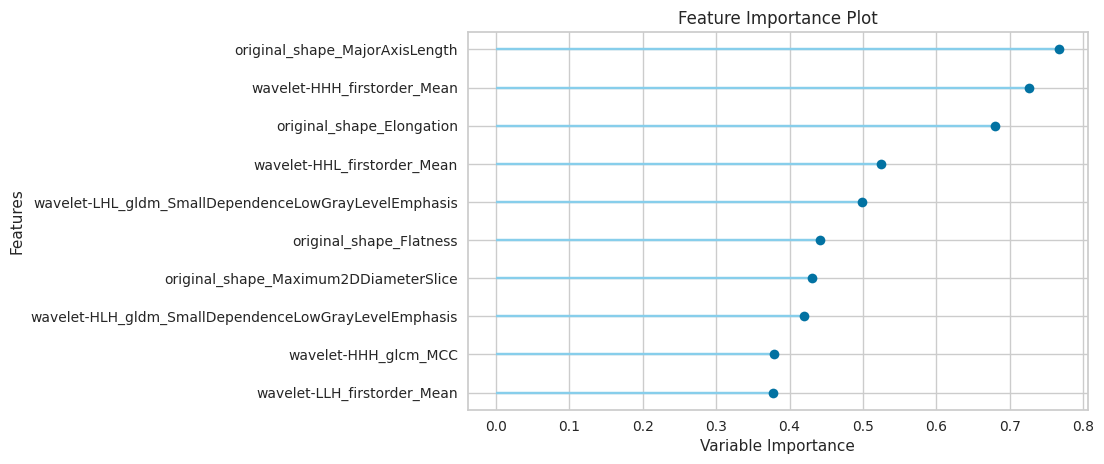

GaussianNB(priors=None, var_smoothing=1e-09)


In [101]:
# plot feature importance
for best in best_3:
    try:
        print(best)
        plot_model(best, plot = 'feature')
    except:
        continue     

In [102]:
# interpret summary model
for best in best_3:
    try:
        print(best)
        interpret_model(best, plot = 'summary')
    except:
        continue     

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
GaussianNB(priors=None, var_smoothing=1e-09)


### 2.4.2 Pycaret model with feature selection

In [103]:
s = setup(X_train, target=y_train, fold=5, index=False,train_size=0.98,session_id =random_state,preprocess=False, feature_selection=True)
best_3=compare_models(n_select=4)

,Description,Value
0,Session id,2
1,Target,target
2,Target type,Binary
3,Original data shape,"(73, 851)"
4,Transformed data shape,"(73, 851)"
5,Transformed train set shape,"(71, 851)"
6,Transformed test set shape,"(2, 851)"
7,Numeric features,850


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6619,0.6364,0.6393,0.6890,0.6453,0.3114,0.3409,0.0640
lr,Logistic Regression,0.6210,0.6239,0.5857,0.6476,0.6000,0.2297,0.2576,0.0740
ridge,Ridge Classifier,0.6200,0.0000,0.6107,0.6417,0.6095,0.2263,0.2545,0.0420
knn,K Neighbors Classifier,0.5914,0.6122,0.6250,0.5976,0.6073,0.1821,0.1865,0.1080
ada,Ada Boost Classifier,0.5781,0.5395,0.5036,0.6711,0.5399,0.1425,0.1704,0.2160
gbc,Gradient Boosting Classifier,0.5771,0.5977,0.5536,0.5981,0.5515,0.1336,0.1666,0.3700
et,Extra Trees Classifier,0.5762,0.6017,0.4821,0.6171,0.5384,0.1530,0.1573,0.2780
dummy,Dummy Classifier,0.5210,0.5000,1.0000,0.5210,0.6846,0.0000,0.0000,0.0520
rf,Random Forest Classifier,0.5200,0.5797,0.5321,0.5339,0.5234,0.0281,0.0277,0.3000
qda,Quadratic Discriminant Analysis,0.5190,0.5161,0.5893,0.5369,0.5579,0.0326,0.0332,0.0620


Processing:   0%|          | 0/64 [00:00<?, ?it/s]

## 3. Deep Features
### 3.1 Data Cleaning

In [104]:
deep = pd.read_csv('../summary/deep_features.csv')

In [105]:
deep

,subject,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,...,df_759,df_760,df_761,df_762,df_763,df_764,df_765,df_766,df_767,df_768
0,Lungseg_000_0000.nii.gz,-349.859717,1080.759201,-2168.299667,1343.156412,2220.141808,-621.228658,1442.691681,1730.139183,-3427.161918,...,-1567.994970,-1394.975433,-624.566055,-1763.000751,2119.216110,-54.507357,-836.157459,-456.387661,901.858521,-169.078494
1,Lungseg_001_0000.nii.gz,152.874611,986.481560,-2217.219368,1605.033489,2614.999992,-544.366254,1760.485484,2268.557392,-1045.004300,...,-2614.674301,-1495.686504,-387.309066,-2418.654259,2210.338108,904.508126,-1433.152848,-555.107102,851.489816,-366.131784
2,Lungseg_002_0000.nii.gz,-116.869402,1570.915329,-2610.462696,1438.245382,2239.261925,-359.208884,1680.943039,2261.838364,-1400.232622,...,-1906.573574,-1416.808773,-196.150530,-2371.207458,1866.022827,-123.024850,-636.298245,-334.247024,1303.520802,-1210.061530
3,Lungseg_003_0000.nii.gz,-270.241526,1674.369297,-2285.255375,1326.978806,2881.380409,-638.282200,1730.124712,2583.425919,-1561.740147,...,-2366.080215,-1145.127693,-473.535217,-2427.496414,2077.611549,791.520916,-2045.442230,-35.245523,445.542586,-680.200973
4,Lungseg_005_0000.nii.gz,-719.809464,1258.301711,-2185.639275,1640.208782,2691.001984,-661.082548,1457.049026,2071.217232,-3689.236830,...,-2516.915245,-1200.542538,-513.195483,-2094.121616,2524.183029,611.986171,-1133.616298,-360.987865,389.338480,1621.442295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Lungseg_186_0000.nii.gz,-91.150366,1628.306122,-2786.766373,1963.286572,2569.271881,-214.955015,1258.190201,2081.483330,430.089917,...,-2175.852753,-1550.944235,-80.785838,-1455.956202,2727.380193,1958.764641,-855.759302,-347.187710,868.938987,1053.197936
177,Lungseg_187_0000.nii.gz,-665.235773,1102.922115,-2464.014393,1845.330786,2416.084104,-535.247661,889.322193,2240.601536,-126.413209,...,-1783.539917,-1538.040237,-377.598696,-1786.505371,2341.177301,1207.500217,-881.457957,-79.224763,975.437689,-45.512312
178,Lungseg_188_0000.nii.gz,-341.926168,1945.166023,-3061.133652,1765.509930,2482.491966,-457.931742,1346.997416,2087.132656,-2392.360966,...,-1576.967388,-1840.308739,-751.006447,-2302.228340,2737.012946,1144.088766,-913.461713,-591.936297,969.150687,-469.197573
179,Lungseg_189_0000.nii.gz,-247.045135,620.214573,-1899.155426,2243.306690,2241.167885,-1228.948551,1639.053875,2252.137779,-327.905142,...,-1735.078064,-1538.305646,72.456976,-1931.775246,1728.451756,979.723309,-1328.369186,-340.954283,1068.629548,-825.817113


In [106]:
summary = pd.read_csv('../summary/summary.csv')

In [107]:
summary.head()

,ID,subject,category,patient,descripsion,imagename
0,0,Lung_15_271,pnemonitis1.5,Simmons_Ruby_Ray,Ct_Chest_W_Contrast - 3724,Lungseg_000_0000.nii.gz
1,1,Lung_15_222,pnemonitis1.5,Montgomery_Cindy_B,Ct_Chest_Wo_Contrast - 28733,Lungseg_001_0000.nii.gz
2,2,Lung_15_243,pnemonitis1.5,Sheff_Medgar_Tyrone,Ct_Chest_W_Contrast - 33451,Lungseg_002_0000.nii.gz
3,3,Lung_15_220,pnemonitis1.5,Shore_Wiley_Walter,Ct_Chest_Abdomen_Pelvis_W_Contrast_(Trauma) - ...,Lungseg_003_0000.nii.gz
4,5,Lung_15_264,pnemonitis1.5,Price_Cynthia_Lynn,Ct_Chest_Wo_Contrast - 27101,Lungseg_005_0000.nii.gz


In [108]:
deep_df= summary.merge(deep,left_on='imagename',right_on='subject')

In [109]:
deep_df.head()

,ID,subject_x,category,patient,descripsion,imagename,subject_y,df_1,df_2,df_3,...,df_759,df_760,df_761,df_762,df_763,df_764,df_765,df_766,df_767,df_768
0,0,Lung_15_271,pnemonitis1.5,Simmons_Ruby_Ray,Ct_Chest_W_Contrast - 3724,Lungseg_000_0000.nii.gz,Lungseg_000_0000.nii.gz,-349.859717,1080.759201,-2168.299667,...,-1567.994970,-1394.975433,-624.566055,-1763.000751,2119.216110,-54.507357,-836.157459,-456.387661,901.858521,-169.078494
1,1,Lung_15_222,pnemonitis1.5,Montgomery_Cindy_B,Ct_Chest_Wo_Contrast - 28733,Lungseg_001_0000.nii.gz,Lungseg_001_0000.nii.gz,152.874611,986.481560,-2217.219368,...,-2614.674301,-1495.686504,-387.309066,-2418.654259,2210.338108,904.508126,-1433.152848,-555.107102,851.489816,-366.131784
2,2,Lung_15_243,pnemonitis1.5,Sheff_Medgar_Tyrone,Ct_Chest_W_Contrast - 33451,Lungseg_002_0000.nii.gz,Lungseg_002_0000.nii.gz,-116.869402,1570.915329,-2610.462696,...,-1906.573574,-1416.808773,-196.150530,-2371.207458,1866.022827,-123.024850,-636.298245,-334.247024,1303.520802,-1210.061530
3,3,Lung_15_220,pnemonitis1.5,Shore_Wiley_Walter,Ct_Chest_Abdomen_Pelvis_W_Contrast_(Trauma) - ...,Lungseg_003_0000.nii.gz,Lungseg_003_0000.nii.gz,-270.241526,1674.369297,-2285.255375,...,-2366.080215,-1145.127693,-473.535217,-2427.496414,2077.611549,791.520916,-2045.442230,-35.245523,445.542586,-680.200973
4,5,Lung_15_264,pnemonitis1.5,Price_Cynthia_Lynn,Ct_Chest_Wo_Contrast - 27101,Lungseg_005_0000.nii.gz,Lungseg_005_0000.nii.gz,-719.809464,1258.301711,-2185.639275,...,-2516.915245,-1200.542538,-513.195483,-2094.121616,2524.183029,611.986171,-1133.616298,-360.987865,389.338480,1621.442295


In [110]:
deep_df=deep_df[(deep_df['category']=='1.5mm normals immunotherapy')|(deep_df['category']=='pre1.5')]
deep_df['target']=(deep_df['category']=='pre1.5').astype('int')

In [111]:
deep_df

,ID,subject_x,category,patient,descripsion,imagename,subject_y,df_1,df_2,df_3,...,df_760,df_761,df_762,df_763,df_764,df_765,df_766,df_767,df_768,target
45,46,Lung_15_301,pre1.5,Hutchins_Edgar_Stevenson,Ct_Chest_Abdomen_Pelvi - 774,Lungseg_046_0000.nii.gz,Lungseg_046_0000.nii.gz,-448.396073,566.271381,-2239.897438,...,-956.996040,-647.902340,-2033.981721,2324.961494,944.547076,-1447.217632,53.447702,1062.238567,-1581.751857,1
46,47,Lung_15_284,pre1.5,Young_Barbara_Jo,Ct_Chest_Wo_Contrast - 2907,Lungseg_047_0000.nii.gz,Lungseg_047_0000.nii.gz,-275.629835,1078.489365,-2029.354626,...,-1578.694878,41.874392,-2029.259041,2064.622719,579.620963,-1176.926434,-54.109707,633.974542,-1052.164940,1
47,48,Lung_15_276,pre1.5,Cobb_Robert_Lee,Ct_Chest_Abdomen_Pelvi - 5970,Lungseg_048_0000.nii.gz,Lungseg_048_0000.nii.gz,16.709219,1210.233465,-1988.697598,...,-1012.651404,-28.009856,-2305.643845,2014.558704,510.062683,-845.990122,-637.928017,522.192787,-113.571246,1
48,49,Lung_15_310,pre1.5,Finney_Jerry_Lee,ChestAbdPelvis - 28483,Lungseg_049_0000.nii.gz,Lungseg_049_0000.nii.gz,87.402234,1252.739016,-2352.317772,...,-756.847015,-290.938316,-1746.475796,1752.327744,586.526142,-1067.836195,-415.060962,903.898451,-856.298664,1
49,50,Lung_15_348,pre1.5,Loggins_Ronnie_Joe,Thorax_Xl_Chest_With_(Adult) - 417408257,Lungseg_050_0000.nii.gz,Lungseg_050_0000.nii.gz,-534.755374,1381.454967,-2750.520145,...,-2295.646233,-833.419125,-1173.408680,2047.013977,1187.472757,-947.218277,-139.385922,1451.946341,211.262985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,186,Lung_15_224,1.5mm normals immunotherapy,Tullock_Kathy_Hutchins,Ct_Chest_Wo_Iv_Contrast - 722708797,Lungseg_186_0000.nii.gz,Lungseg_186_0000.nii.gz,-91.150366,1628.306122,-2786.766373,...,-1550.944235,-80.785838,-1455.956202,2727.380193,1958.764641,-855.759302,-347.187710,868.938987,1053.197936,0
177,187,Lung_15_243,1.5mm normals immunotherapy,Warren_Natalie_Yvonne,Ct_Chest_W_Iv_Contrast - 36163,Lungseg_187_0000.nii.gz,Lungseg_187_0000.nii.gz,-665.235773,1102.922115,-2464.014393,...,-1538.040237,-377.598696,-1786.505371,2341.177301,1207.500217,-881.457957,-79.224763,975.437689,-45.512312,0
178,188,Lung_15_232,1.5mm normals immunotherapy,Washington_Leonard_Charles,Thorax_Chest_Wo_(Adult) - 557188790,Lungseg_188_0000.nii.gz,Lungseg_188_0000.nii.gz,-341.926168,1945.166023,-3061.133652,...,-1840.308739,-751.006447,-2302.228340,2737.012946,1144.088766,-913.461713,-591.936297,969.150687,-469.197573,0
179,189,Lung_Axial_15_mm_5,1.5mm normals immunotherapy,White_Robert_Littrell__Sr,Cta_Chest_For_Pe - 556964729,Lungseg_189_0000.nii.gz,Lungseg_189_0000.nii.gz,-247.045135,620.214573,-1899.155426,...,-1538.305646,72.456976,-1931.775246,1728.451756,979.723309,-1328.369186,-340.954283,1068.629548,-825.817113,0


In [112]:
deep_df=deep_df.set_index('imagename')

In [113]:
deep_df.head()

,ID,subject_x,category,patient,descripsion,subject_y,df_1,df_2,df_3,df_4,...,df_760,df_761,df_762,df_763,df_764,df_765,df_766,df_767,df_768,target
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_046_0000.nii.gz,46,Lung_15_301,pre1.5,Hutchins_Edgar_Stevenson,Ct_Chest_Abdomen_Pelvi - 774,Lungseg_046_0000.nii.gz,-448.396073,566.271381,-2239.897438,1424.521172,...,-956.996040,-647.902340,-2033.981721,2324.961494,944.547076,-1447.217632,53.447702,1062.238567,-1581.751857,1
Lungseg_047_0000.nii.gz,47,Lung_15_284,pre1.5,Young_Barbara_Jo,Ct_Chest_Wo_Contrast - 2907,Lungseg_047_0000.nii.gz,-275.629835,1078.489365,-2029.354626,1299.671748,...,-1578.694878,41.874392,-2029.259041,2064.622719,579.620963,-1176.926434,-54.109707,633.974542,-1052.164940,1
Lungseg_048_0000.nii.gz,48,Lung_15_276,pre1.5,Cobb_Robert_Lee,Ct_Chest_Abdomen_Pelvi - 5970,Lungseg_048_0000.nii.gz,16.709219,1210.233465,-1988.697598,1774.955044,...,-1012.651404,-28.009856,-2305.643845,2014.558704,510.062683,-845.990122,-637.928017,522.192787,-113.571246,1
Lungseg_049_0000.nii.gz,49,Lung_15_310,pre1.5,Finney_Jerry_Lee,ChestAbdPelvis - 28483,Lungseg_049_0000.nii.gz,87.402234,1252.739016,-2352.317772,1417.137579,...,-756.847015,-290.938316,-1746.475796,1752.327744,586.526142,-1067.836195,-415.060962,903.898451,-856.298664,1
Lungseg_050_0000.nii.gz,50,Lung_15_348,pre1.5,Loggins_Ronnie_Joe,Thorax_Xl_Chest_With_(Adult) - 417408257,Lungseg_050_0000.nii.gz,-534.755374,1381.454967,-2750.520145,1686.969717,...,-2295.646233,-833.419125,-1173.408680,2047.013977,1187.472757,-947.218277,-139.385922,1451.946341,211.262985,1


In [114]:
deep_features= list(deep_df.columns[6:])
deep_features.append(deep_df.columns[3])

In [115]:
deep_data = deep_df[deep_features]

In [116]:
deep_data.head()

,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,...,df_761,df_762,df_763,df_764,df_765,df_766,df_767,df_768,target,patient
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_046_0000.nii.gz,-448.396073,566.271381,-2239.897438,1424.521172,2673.774124,-986.210740,1692.109756,1998.921112,-1040.976491,-1486.655120,...,-647.902340,-2033.981721,2324.961494,944.547076,-1447.217632,53.447702,1062.238567,-1581.751857,1,Hutchins_Edgar_Stevenson
Lungseg_047_0000.nii.gz,-275.629835,1078.489365,-2029.354626,1299.671748,2178.474663,-616.358154,1434.101955,2087.854553,423.776519,-337.437845,...,41.874392,-2029.259041,2064.622719,579.620963,-1176.926434,-54.109707,633.974542,-1052.164940,1,Young_Barbara_Jo
Lungseg_048_0000.nii.gz,16.709219,1210.233465,-1988.697598,1774.955044,1962.744099,-347.685057,1870.987885,1886.999779,-2117.143250,-333.231415,...,-28.009856,-2305.643845,2014.558704,510.062683,-845.990122,-637.928017,522.192787,-113.571246,1,Cobb_Robert_Lee
Lungseg_049_0000.nii.gz,87.402234,1252.739016,-2352.317772,1417.137579,2097.925507,-606.147392,1309.509266,1677.064297,-2280.296576,214.633817,...,-290.938316,-1746.475796,1752.327744,586.526142,-1067.836195,-415.060962,903.898451,-856.298664,1,Finney_Jerry_Lee
Lungseg_050_0000.nii.gz,-534.755374,1381.454967,-2750.520145,1686.969717,2507.643524,-508.349387,1241.793846,2315.484982,-1045.954430,-822.437060,...,-833.419125,-1173.408680,2047.013977,1187.472757,-947.218277,-139.385922,1451.946341,211.262985,1,Loggins_Ronnie_Joe


In [117]:
import collections
deep = collections.defaultdict(dict)

In [118]:
deepdict={}
for column in deep_data.columns[:-2]:
    deepdict[column]={'min':deep_data[column].min(), 'diff':deep_data[column].max() - deep_data[column].min()}
    deep_data[column] = (deep_data[column] - deep_data[column].min()) / (deep_data[column].max() - deep_data[column].min())

In [119]:
deep_data.head()

,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,...,df_761,df_762,df_763,df_764,df_765,df_766,df_767,df_768,target,patient
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_046_0000.nii.gz,0.282136,0.052851,0.862546,0.126114,0.150346,0.246004,0.205458,0.111500,0.679186,0.648003,...,0.317766,0.810547,0.145372,0.264845,0.728855,0.898819,0.215102,0.492863,1,Hutchins_Edgar_Stevenson
Lungseg_047_0000.nii.gz,0.326628,0.150854,0.898459,0.096436,0.085813,0.463082,0.160896,0.122649,0.818309,0.856971,...,0.550639,0.811282,0.112843,0.195570,0.775005,0.840977,0.095454,0.580943,1,Young_Barbara_Jo
Lungseg_048_0000.nii.gz,0.401914,0.176061,0.905394,0.209418,0.057705,0.620774,0.236353,0.097470,0.576971,0.857736,...,0.527045,0.768280,0.106588,0.182365,0.831510,0.527012,0.064225,0.737048,1,Cobb_Robert_Lee
Lungseg_049_0000.nii.gz,0.420119,0.184193,0.843371,0.124359,0.075318,0.469075,0.139377,0.071152,0.561475,0.957357,...,0.438279,0.855279,0.073822,0.196881,0.793631,0.646865,0.170865,0.613519,1,Finney_Jerry_Lee
Lungseg_050_0000.nii.gz,0.259897,0.208821,0.775448,0.188502,0.128700,0.526476,0.127682,0.151185,0.678713,0.768781,...,0.255134,0.944441,0.110643,0.310961,0.814226,0.795117,0.323978,0.791074,1,Loggins_Ronnie_Joe


### 3.2 Logit Regression

In [120]:
y = deep_data['target']
X =deep_data.drop(['target','patient'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [121]:
lr = LogisticRegression(max_iter=1000,).fit(X_train, y_train)

In [122]:
lr.score(X_test, y_test)

0.6842105263157895

### 3.3 Chi Square

In [123]:
z= feature_selection.chi2(X, y)
fs = []
for idx, x in enumerate(X.columns):
    fs.append({'name':x,'chi2':z[0][idx], 'p-val':z[1][idx]})
fs.sort(key=lambda x:-x['chi2'])

In [124]:
feature_size = 20
fs[:feature_size]

[{'name': 'df_63', 'chi2': 0.9550298923184833, 'p-val': 0.32844227761952166},
 {'name': 'df_264', 'chi2': 0.6062820640694185, 'p-val': 0.4361911227988292},
 {'name': 'df_108', 'chi2': 0.6047647232994906, 'p-val': 0.43676582138092523},
 {'name': 'df_270', 'chi2': 0.5845906697661529, 'p-val': 0.44451852967075534},
 {'name': 'df_43', 'chi2': 0.5519802438078041, 'p-val': 0.4575096946257714},
 {'name': 'df_705', 'chi2': 0.5483094035542333, 'p-val': 0.4590092948337011},
 {'name': 'df_34', 'chi2': 0.5414095341553008, 'p-val': 0.46184915618311173},
 {'name': 'df_476', 'chi2': 0.4786069479022528, 'p-val': 0.4890539904301052},
 {'name': 'df_216', 'chi2': 0.46871014338936234, 'p-val': 0.4935811620901692},
 {'name': 'df_534', 'chi2': 0.4666784822618294, 'p-val': 0.49451920373067715},
 {'name': 'df_636', 'chi2': 0.4455639139784756, 'p-val': 0.5044491439600314},
 {'name': 'df_79', 'chi2': 0.4347914284765606, 'p-val': 0.5096471843815167},
 {'name': 'df_583', 'chi2': 0.4219964430312979, 'p-val': 0.515

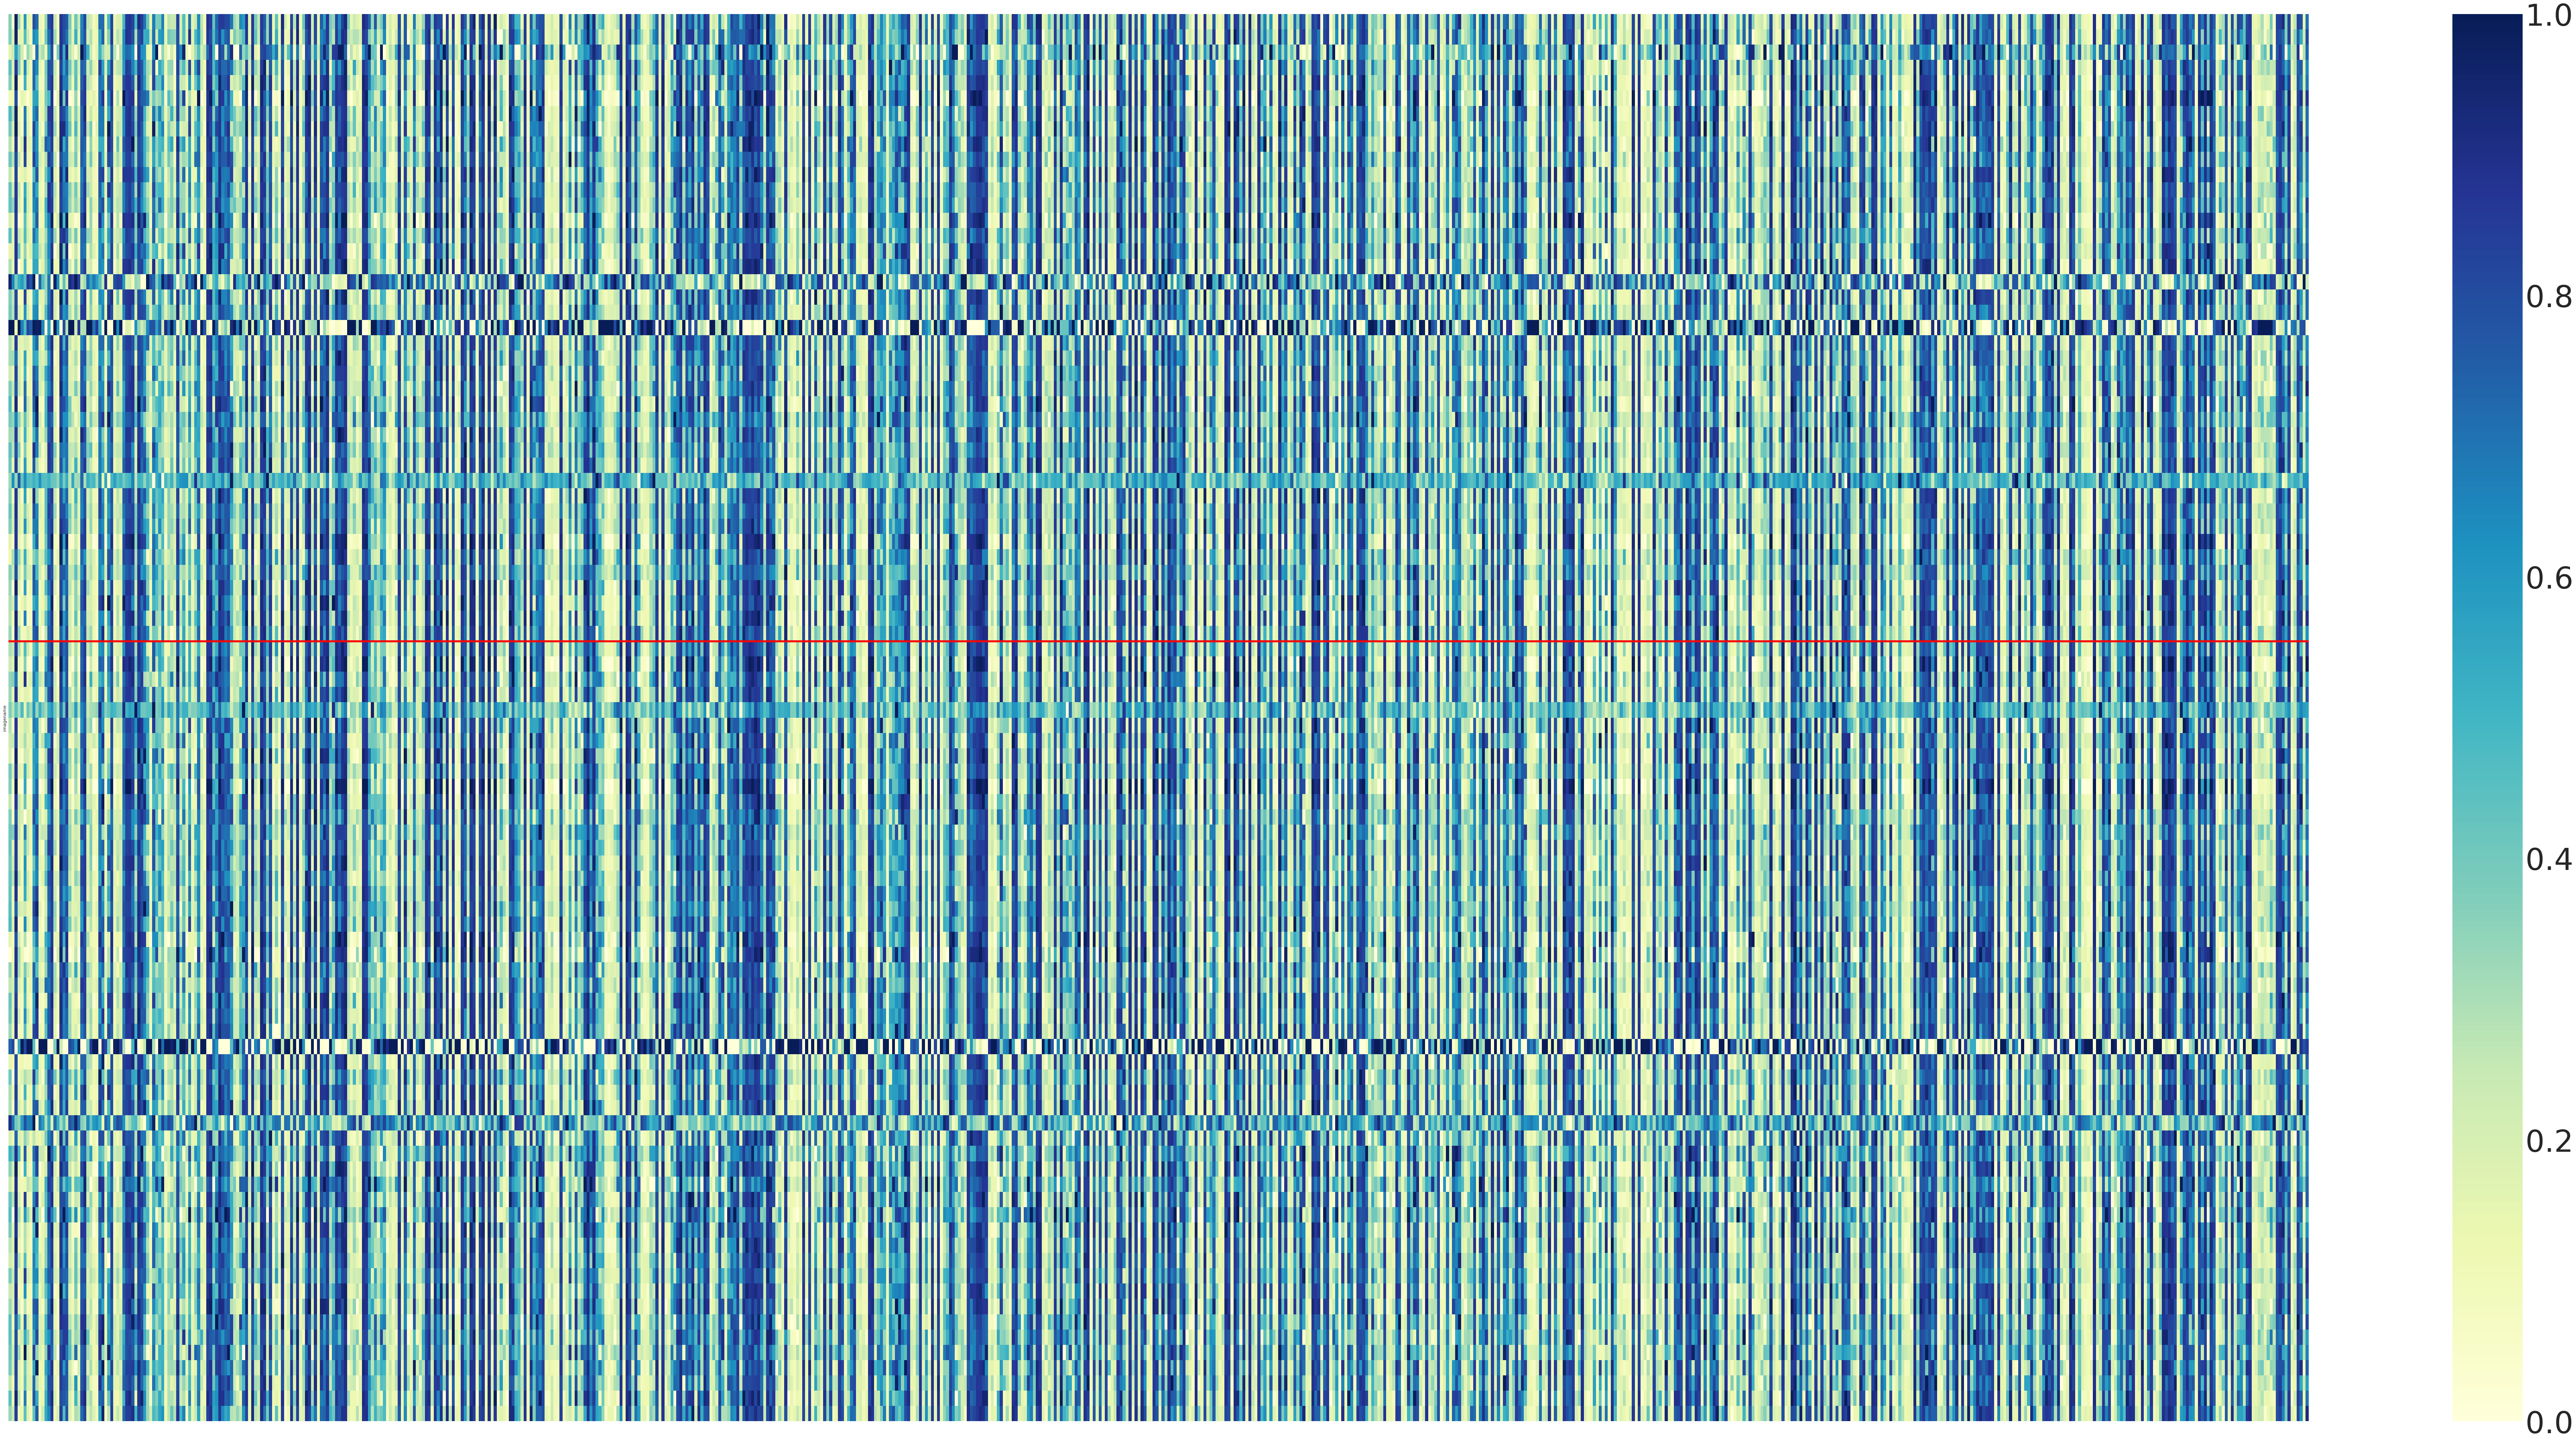

In [125]:
heatmap = deep_data.drop(['patient'],axis=1)
# Sort the DataFrame by the specified column
sorted_df = heatmap.sort_values(by='target')
len(sorted_df[sorted_df.target ==0])
hm = sorted_df.drop(['target'],axis=1)
fig, axes = plt.subplots( figsize=(100, 50))  # 2 rows, 1 column
heatmap = sns.heatmap(hm, cmap='YlGnBu',xticklabels='', yticklabels='')
# Access the color bar object from the heatmap
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=75)  # Adjust the font size as needed (e.g., labelsize=10)

# Draw a horizontal line at the specified position (e.g., row index 2)
plt.axhline(y=41, color='red', linewidth=5, linestyle='-')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### 3.3.1 Model with selected features

In [126]:
X_train_= X_train[[i['name'] for i in fs[:feature_size]]]
X_test_= X_test[[i['name'] for i in fs[:feature_size]]]
clf_ = LogisticRegression(penalty='l1',random_state=random_state,solver='liblinear').fit(X_train_, y_train)
clf_.score(X_test_, y_test)

0.631578947368421

### 3.3.2 Nomogram

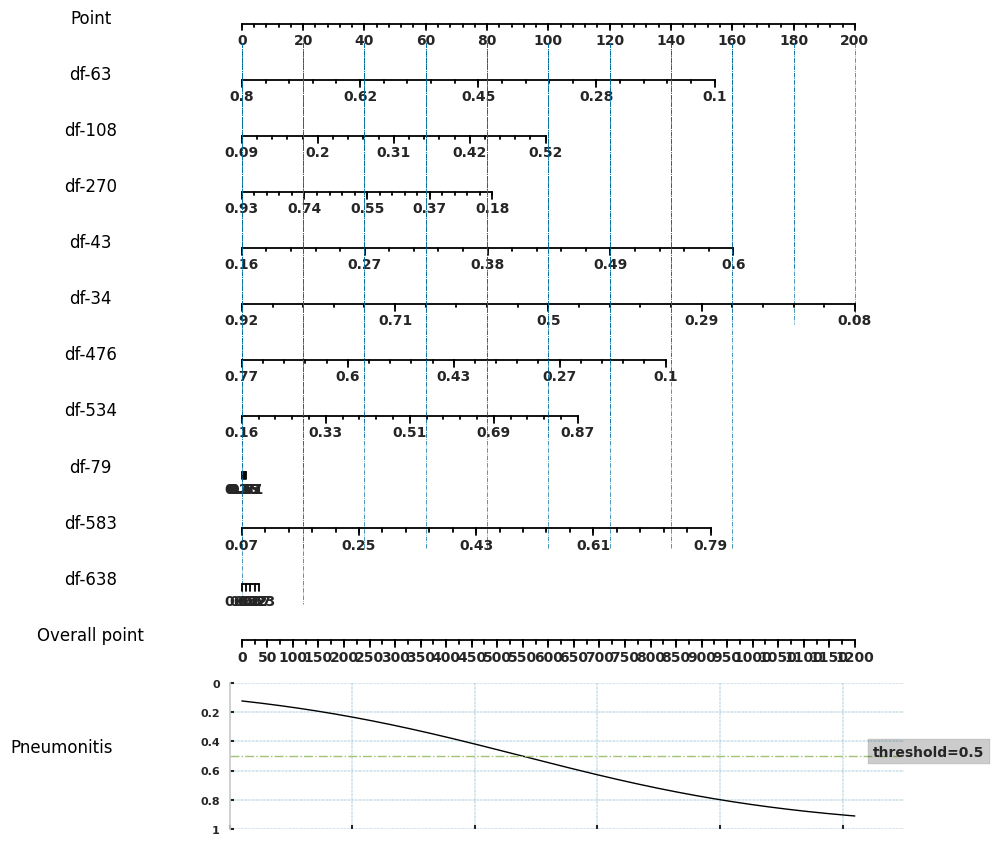

In [127]:
model = clf_
model_path = './model.xlsx'
dic=[{'feature':'intercept','coef':model.intercept_[0]},{'feature':'threshold','coef':0.5}]
for i,fea in enumerate(model.feature_names_in_):
    if not model.coef_[0][i]==0:
        row = {'feature':fea.replace('_','-'),\
               'coef':model.coef_[0][i],\
               'min':X_train_.describe(percentiles=[0.05,0.95]).iloc[4,i],\
               'max':X_train_.describe(percentiles=[0.05,0.95]).iloc[6,i]
              }
        if X_train_.describe(percentiles=[0.05,0.95]).iloc[5,i]==0:
            row['type']='nominal'
        else:
            row['type']='continuous'
        dic.append(row)
nomogram = pd.DataFrame.from_dict(dic) 
nomogram['position']=None
nomogram.to_excel(model_path, index=False)
nomo = simpleNomo.nomogram(path=model_path,result_title="Pneumonitis",total_point=200)

### 3.4 PyCaret

In [128]:
setup(X, target=y, fold=5, train_size=0.98,session_id =random_state,preprocess=False)

,Description,Value
0,Session id,2
1,Target,target
2,Target type,Binary
3,Original data shape,"(92, 769)"
4,Transformed data shape,"(92, 769)"
5,Transformed train set shape,"(90, 769)"
6,Transformed test set shape,"(2, 769)"
7,Numeric features,768


In [129]:
best_3=compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6444,0.7125,0.7000,0.6732,0.6728,0.2776,0.2865,0.0440
lr,Logistic Regression,0.6111,0.6575,0.7000,0.6375,0.6617,0.2032,0.2123,0.0440
ridge,Ridge Classifier,0.6000,0.0000,0.6200,0.6601,0.6166,0.1941,0.2086,0.0280
lightgbm,Light Gradient Boosting Machine,0.6000,0.5925,0.7200,0.6247,0.6615,0.1731,0.1846,6.6860
svm,SVM - Linear Kernel,0.5889,0.0000,0.7000,0.6034,0.6034,0.1550,0.1769,0.0320
rf,Random Forest Classifier,0.5778,0.5850,0.6400,0.6114,0.6131,0.1426,0.1476,0.2540
et,Extra Trees Classifier,0.5778,0.6175,0.6400,0.6134,0.6116,0.1426,0.1495,0.2400
knn,K Neighbors Classifier,0.5556,0.5712,0.5600,0.5810,0.5632,0.1148,0.1100,0.0780
dt,Decision Tree Classifier,0.5556,0.5525,0.5800,0.5992,0.5852,0.1064,0.1094,0.0360
gbc,Gradient Boosting Classifier,0.5556,0.5775,0.6200,0.5970,0.5997,0.0957,0.0981,0.3700


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

In [130]:
for clfmodel in best_3:
    print(clfmodel)
    ml = create_model(clfmodel)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.7625,0.8000,0.7273,0.7619,0.4304,0.4332
1,0.7778,0.8375,0.7000,0.8750,0.7778,0.5610,0.5750
2,0.7222,0.6750,0.9000,0.6923,0.7826,0.4156,0.4438
3,0.4444,0.5875,0.3000,0.5000,0.3750,-0.0714,-0.0791
4,0.5556,0.7000,0.8000,0.5714,0.6667,0.0526,0.0598
Mean,0.6444,0.7125,0.7000,0.6732,0.6728,0.2776,0.2865
Std,0.1247,0.0840,0.2098,0.1299,0.1548,0.2429,0.2508


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6111,0.6875,0.7000,0.6364,0.6667,0.2025,0.2039
1,0.6667,0.6875,0.7000,0.7000,0.7000,0.3250,0.3250
2,0.6667,0.7625,0.9000,0.6429,0.7500,0.2895,0.3287
3,0.5556,0.4875,0.5000,0.6250,0.5556,0.1220,0.1250
4,0.5556,0.6625,0.7000,0.5833,0.6364,0.0769,0.0791
Mean,0.6111,0.6575,0.7000,0.6375,0.6617,0.2032,0.2123
Std,0.0497,0.0914,0.1265,0.0375,0.0651,0.0947,0.1017


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6111,0.0000,0.7000,0.6364,0.6667,0.2025,0.2039
1,0.6667,0.0000,0.5000,0.8333,0.6250,0.3571,0.3953
2,0.7222,0.0000,0.9000,0.6923,0.7826,0.4156,0.4438
3,0.5000,0.0000,0.3000,0.6000,0.4000,0.0471,0.0555
4,0.5000,0.0000,0.7000,0.5385,0.6087,-0.0519,-0.0555
Mean,0.6000,0.0000,0.6200,0.6601,0.6166,0.1941,0.2086
Std,0.0889,0.0000,0.2040,0.1000,0.1242,0.1777,0.1915


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### 3.4.1 Feature selection by Pycaret


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


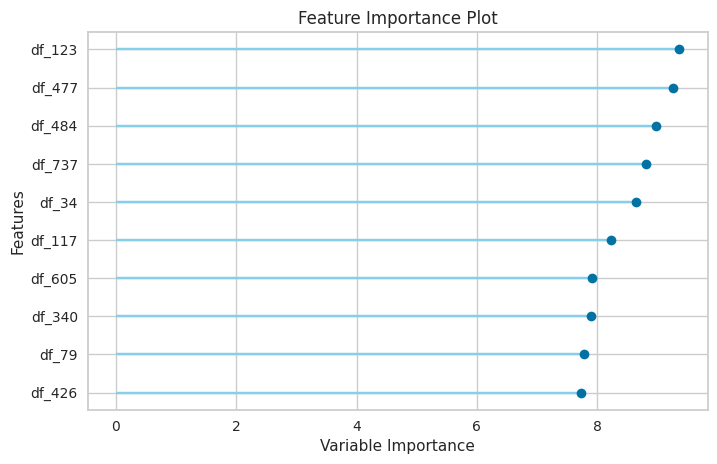

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


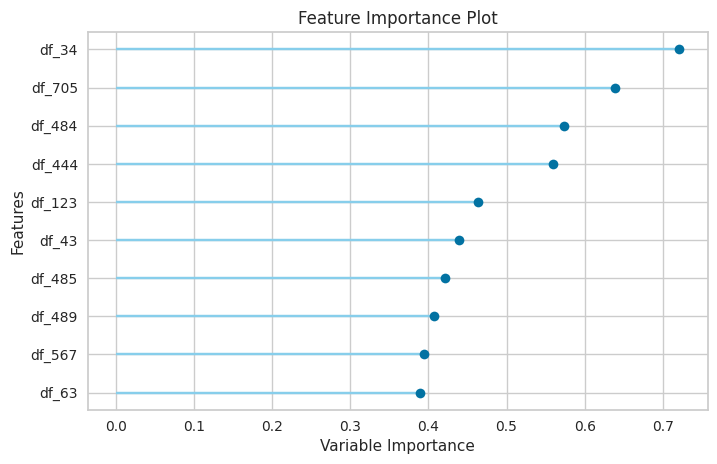

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)


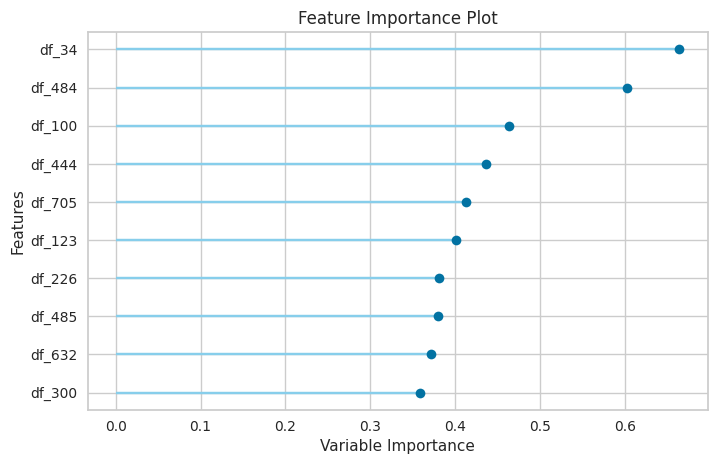

In [131]:
# plot feature importance
for best in best_3:
    try:
        print(best)
        plot_model(best, plot = 'feature')
    except:
        continue     

In [132]:
# interpret summary model
for best in best_3:
    try:
        print(best)
        interpret_model(best, plot = 'summary')
    except:
        continue     

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)


### 3.4.2 Pycaret model with feature selection

In [133]:
s = setup(X_train, target=y_train, fold=5, index=False,train_size=0.98,session_id =random_state,preprocess=False, feature_selection=True)
best_3=compare_models(n_select=4)

,Description,Value
0,Session id,2
1,Target,target
2,Target type,Binary
3,Original data shape,"(73, 769)"
4,Transformed data shape,"(73, 769)"
5,Transformed train set shape,"(71, 769)"
6,Transformed test set shape,"(2, 769)"
7,Numeric features,768


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6162,0.6082,0.5786,0.6257,0.5892,0.2288,0.2394,0.0800
et,Extra Trees Classifier,0.5895,0.5614,0.5857,0.6071,0.5947,0.1786,0.1798,0.2520
lda,Linear Discriminant Analysis,0.5762,0.5677,0.5357,0.6167,0.5657,0.1506,0.1579,0.0440
dt,Decision Tree Classifier,0.5638,0.5571,0.5571,0.6102,0.5318,0.1176,0.1463,0.0400
lr,Logistic Regression,0.5486,0.5273,0.5321,0.5550,0.5406,0.0940,0.0928,0.0480
ada,Ada Boost Classifier,0.5476,0.5202,0.4857,0.6076,0.5197,0.0981,0.1104,0.1880
rf,Random Forest Classifier,0.5333,0.5348,0.5357,0.5514,0.5367,0.0673,0.0672,0.2520
gbc,Gradient Boosting Classifier,0.5210,0.4960,0.5036,0.6138,0.5121,0.0370,0.0416,0.3280
dummy,Dummy Classifier,0.5210,0.5000,1.0000,0.5210,0.6846,0.0000,0.0000,0.0340
ridge,Ridge Classifier,0.5048,0.0000,0.5071,0.5073,0.4997,0.0098,0.0137,0.0360


Processing:   0%|          | 0/64 [00:00<?, ?it/s]

## 4. Total Features
### 4.1 Data Cleaning

In [164]:
clinical_data.head()

,BMI at diagnosis,Pack years,target,ECOG PS at the time of immunotherapy,Patient name,Total cycles of IO given,Age,Choice of immunotherapy_atezolizumab,Choice of immunotherapy_combination,Choice of immunotherapy_durvalumab,...,Choice of immunotherapy_other,Choice of immunotherapy_pembrolizumab,Baseline oxygen dependence_no,Baseline oxygen dependence_yes,IO given concurrently with chemotherapy_no,IO given concurrently with chemotherapy_yes,Received surgery prior to immunotherapy_no,Received surgery prior to immunotherapy_yes,Received radiation prior to immunotherapy_no,Received radiation prior to immunotherapy_yes
Patient ID,,,,,,,,,,,,,,,,,,,,,
3700814,22.63,28.0,1,0,Arnold_George_Nathaniel,14.0,65,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1211439,28.30,60.0,1,1,Bailey_William_Arthur,18.0,76,0,0,0,...,0,1,1,0,0,1,1,0,0,1
1704302,24.10,30.0,1,0,Barfield_Dora_Kaye,13.0,66,0,0,0,...,0,1,1,0,0,1,1,0,1,0
4668233,27.40,88.0,1,2,Chambers_Calvin,13.0,60,0,0,1,...,0,0,1,0,1,0,1,0,0,1
546277,25.40,80.0,1,1,Cobb_Robert_Lee,2.0,61,0,0,0,...,0,0,1,0,1,0,0,1,0,1


In [167]:
clinical_data.columns

Index(['BMI at diagnosis', 'Pack years', 'target',
       'ECOG PS at the time of immunotherapy', 'Patient name',
       'Total cycles of IO given', 'Age',
       'Choice of immunotherapy_atezolizumab',
       'Choice of immunotherapy_combination',
       'Choice of immunotherapy_durvalumab',
       'Choice of immunotherapy_lenvatinib',
       'Choice of immunotherapy_nivolumab', 'Choice of immunotherapy_other',
       'Choice of immunotherapy_pembrolizumab',
       'Baseline oxygen dependence_no', 'Baseline oxygen dependence_yes',
       'IO given concurrently with chemotherapy_no',
       'IO given concurrently with chemotherapy_yes',
       'Received surgery prior to immunotherapy_no',
       'Received surgery prior to immunotherapy_yes',
       'Received radiation prior to immunotherapy_no',
       'Received radiation prior to immunotherapy_yes'],
      dtype='object')

In [135]:
deep_data.head()

,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,...,df_761,df_762,df_763,df_764,df_765,df_766,df_767,df_768,target,patient
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_046_0000.nii.gz,0.282136,0.052851,0.862546,0.126114,0.150346,0.246004,0.205458,0.111500,0.679186,0.648003,...,0.317766,0.810547,0.145372,0.264845,0.728855,0.898819,0.215102,0.492863,1,Hutchins_Edgar_Stevenson
Lungseg_047_0000.nii.gz,0.326628,0.150854,0.898459,0.096436,0.085813,0.463082,0.160896,0.122649,0.818309,0.856971,...,0.550639,0.811282,0.112843,0.195570,0.775005,0.840977,0.095454,0.580943,1,Young_Barbara_Jo
Lungseg_048_0000.nii.gz,0.401914,0.176061,0.905394,0.209418,0.057705,0.620774,0.236353,0.097470,0.576971,0.857736,...,0.527045,0.768280,0.106588,0.182365,0.831510,0.527012,0.064225,0.737048,1,Cobb_Robert_Lee
Lungseg_049_0000.nii.gz,0.420119,0.184193,0.843371,0.124359,0.075318,0.469075,0.139377,0.071152,0.561475,0.957357,...,0.438279,0.855279,0.073822,0.196881,0.793631,0.646865,0.170865,0.613519,1,Finney_Jerry_Lee
Lungseg_050_0000.nii.gz,0.259897,0.208821,0.775448,0.188502,0.128700,0.526476,0.127682,0.151185,0.678713,0.768781,...,0.255134,0.944441,0.110643,0.310961,0.814226,0.795117,0.323978,0.791074,1,Loggins_Ronnie_Joe


In [136]:
radiomics_data.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength,target,patient
imagename,,,,,,,,,,,,,,,,,,,,,
Lungseg_046_0000.nii.gz,0.327512,0.309344,0.411049,0.624206,0.449242,0.444497,0.618386,0.421439,0.562998,0.563501,...,0.356923,0.711814,0.032933,0.458965,0.144610,0.572474,0.394068,0.074657,1,Hutchins_Edgar_Stevenson
Lungseg_047_0000.nii.gz,0.381641,0.400989,0.290339,0.361230,0.275035,0.418463,0.425862,0.274902,0.285013,0.395044,...,0.105659,0.528463,0.039879,0.332650,0.149869,0.654111,0.274146,0.321317,1,Young_Barbara_Jo
Lungseg_048_0000.nii.gz,0.255098,0.337108,0.320072,0.474639,0.861801,0.426970,0.414146,0.835390,0.251928,0.368492,...,0.544817,0.707957,0.012893,0.219342,0.303243,0.612950,0.485820,0.330267,1,Cobb_Robert_Lee
Lungseg_049_0000.nii.gz,0.225875,0.296313,0.345359,0.559686,0.404967,0.382191,0.497562,0.413597,0.284853,0.406597,...,0.479312,0.479624,0.021626,0.196137,0.313760,0.345332,0.222690,0.383821,1,Finney_Jerry_Lee
Lungseg_050_0000.nii.gz,0.456114,0.429369,0.720305,0.829127,0.669912,0.986587,0.739474,0.724960,0.798404,0.880520,...,0.595201,0.448814,0.080638,0.563903,0.077125,0.515609,0.421257,0.107770,1,Loggins_Ronnie_Joe


In [137]:
summary_data=clinical_data.merge(radiomics_data,how='left',left_on='Patient name', right_on='patient').merge(deep_data,how='left',left_on='patient', right_on='patient')

In [138]:
summary_data=summary_data.dropna()

In [139]:
summary_data.head()

,BMI at diagnosis,Pack years,target_x,ECOG PS at the time of immunotherapy,Patient name,Total cycles of IO given,Age,Choice of immunotherapy_atezolizumab,Choice of immunotherapy_combination,Choice of immunotherapy_durvalumab,...,df_760,df_761,df_762,df_763,df_764,df_765,df_766,df_767,df_768,target
0,22.63,28.0,1,0,Arnold_George_Nathaniel,14.0,65,0,0,0,...,0.490437,0.318951,0.741134,0.173757,0.327519,0.743257,0.483205,0.153158,0.637859,1.0
1,28.30,60.0,1,1,Bailey_William_Arthur,18.0,76,0,0,0,...,0.622136,0.204647,0.876920,0.134549,0.094940,0.803388,0.860112,0.268269,0.798921,1.0
2,24.10,30.0,1,0,Barfield_Dora_Kaye,13.0,66,0,0,0,...,0.411284,0.542982,0.616837,0.281103,0.265027,0.543416,0.653212,0.584133,0.560190,1.0
3,27.40,88.0,1,2,Chambers_Calvin,13.0,60,0,0,1,...,0.654520,0.510872,0.912625,0.088356,0.273464,0.840079,0.780252,0.180197,0.630141,1.0
4,25.40,80.0,1,1,Cobb_Robert_Lee,2.0,61,0,0,0,...,0.905913,0.527045,0.768280,0.106588,0.182365,0.831510,0.527012,0.064225,0.737048,1.0


### 4.2 Logit Regression

In [140]:
y = summary_data['target']
X =summary_data.drop(['target','target_x','target_y','patient','Patient name'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [141]:
lr_total = LogisticRegression(max_iter=2000).fit(X_train, y_train)

In [142]:
lr_total.score(X_train,y_train)

1.0

In [143]:
lr_total.score(X_test,y_test)

0.9375

### 4.3 Chi Square

In [144]:
z= feature_selection.chi2(X, y)
fs = []
for idx, x in enumerate(X.columns):
    fs.append({'name':x,'chi2':z[0][idx], 'p-val':z[1][idx]})
fs.sort(key=lambda x:-x['chi2'])

In [145]:
feature_size=None
fs[:feature_size]

[{'name': 'Total cycles of IO given',
  'chi2': 213.84090909090912,
  'p-val': 1.9949110856697558e-48},
 {'name': 'Pack years',
  'chi2': 150.0218832891247,
  'p-val': 1.7146542804360392e-34},
 {'name': 'BMI at diagnosis',
  'chi2': 28.111530770222235,
  'p-val': 1.1452150378055367e-07},
 {'name': 'Age', 'chi2': 16.933587543692404, 'p-val': 3.871054787561152e-05},
 {'name': 'Choice of immunotherapy_durvalumab',
  'chi2': 3.75,
  'p-val': 0.052807511416113395},
 {'name': 'ECOG PS at the time of immunotherapy',
  'chi2': 2.5789473684210504,
  'p-val': 0.10829365589900906},
 {'name': 'Received radiation prior to immunotherapy_yes',
  'chi2': 1.880208333333334,
  'p-val': 0.17031047118643747},
 {'name': 'wavelet-LLH_glcm_JointEnergy',
  'chi2': 1.5999002060338081,
  'p-val': 0.20591735356396937},
 {'name': 'Received surgery prior to immunotherapy_yes',
  'chi2': 1.5000000000000004,
  'p-val': 0.22067136191984318},
 {'name': 'Choice of immunotherapy_lenvatinib',
  'chi2': 1.5,
  'p-val': 0.

### 4.3.1 Model with selected features

In [146]:
X_train_= X_train[[i['name'] for i in fs[:feature_size]]]
X_test_= X_test[[i['name'] for i in fs[:feature_size]]]
clf_ = LogisticRegression(penalty='l1',random_state=20,solver='liblinear').fit(X_train_, y_train)
clf_.score(X_test_, y_test)

0.9375

### 4.3.2 Nomogram

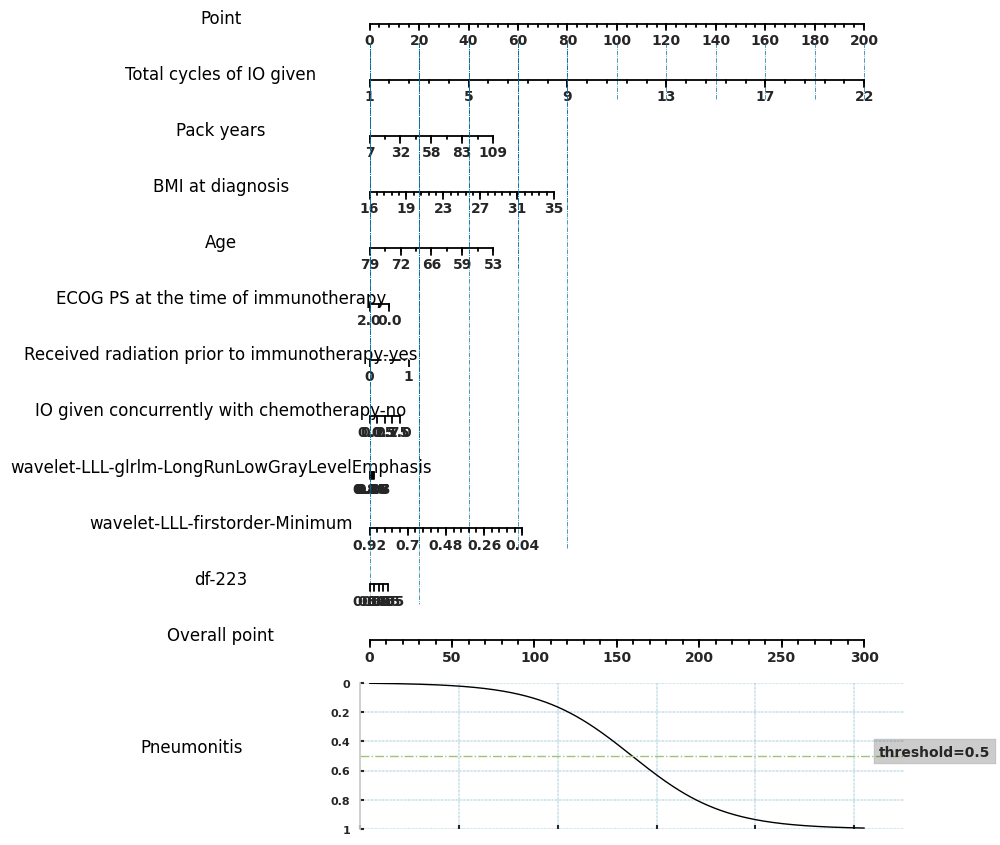

In [147]:
model = clf_
model_path = './model.xlsx'
dic=[{'feature':'intercept','coef':model.intercept_[0]},{'feature':'threshold','coef':0.5}]
for i,fea in enumerate(model.feature_names_in_):
    if not model.coef_[0][i]==0:
        row = {'feature':fea.replace('_','-'),\
               'coef':model.coef_[0][i],\
               'min':X_train_.describe(percentiles=[0.05,0.95]).iloc[4,i],\
               'max':X_train_.describe(percentiles=[0.05,0.95]).iloc[6,i]
              }
        if X_train_.describe(percentiles=[0.05,0.95]).iloc[5,i]==0:
            row['type']='nominal'
        else:
            row['type']='continuous'
        dic.append(row)
nomogram = pd.DataFrame.from_dict(dic) 
nomogram['position']=None
nomogram.to_excel(model_path, index=False)
nomo = simpleNomo.nomogram(path=model_path,result_title="Pneumonitis",total_point=200)

In [148]:
nomo.savefig('test.png')

### 4.4 PyCaret

In [149]:
setup(X, target=y, fold=5, train_size=0.98,session_id =random_state,preprocess=False)

,Description,Value
0,Session id,2
1,Target,target
2,Target type,Binary
3,Original data shape,"(80, 1639)"
4,Transformed data shape,"(80, 1639)"
5,Transformed train set shape,"(78, 1639)"
6,Transformed test set shape,"(2, 1639)"
7,Numeric features,1638


In [150]:
best_3=compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8225,0.8944,0.8533,0.8528,0.8520,0.6275,0.6303,0.1780
ridge,Ridge Classifier,0.8192,0.0000,0.8533,0.8610,0.8524,0.6184,0.6294,0.0620
knn,K Neighbors Classifier,0.8083,0.8921,0.7867,0.8820,0.8303,0.6103,0.6170,0.1240
svm,SVM - Linear Kernel,0.7833,0.0000,0.6644,0.9750,0.7748,0.5919,0.6421,0.0600
gbc,Gradient Boosting Classifier,0.7458,0.8246,0.7889,0.7911,0.7883,0.4716,0.4746,0.5860
ada,Ada Boost Classifier,0.7442,0.8454,0.7644,0.8156,0.7834,0.4609,0.4707,0.2780
dt,Decision Tree Classifier,0.7217,0.7359,0.6622,0.8306,0.7320,0.4520,0.4654,0.0900
et,Extra Trees Classifier,0.6958,0.7096,0.8333,0.7186,0.7702,0.3248,0.3263,0.2860
lightgbm,Light Gradient Boosting Machine,0.6833,0.7785,0.7689,0.7161,0.7324,0.3256,0.3473,5.4920
nb,Naive Bayes,0.6575,0.6181,0.7911,0.7001,0.7356,0.2472,0.2442,0.0860


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

In [151]:
best_3[0]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
clinical_data.loc[clinical_data.index==7962]

,BMI at diagnosis,Pack years,target,ECOG PS at the time of immunotherapy,Patient name,Total cycles of IO given,Age,Choice of immunotherapy_atezolizumab,Choice of immunotherapy_combination,Choice of immunotherapy_durvalumab,...,Choice of immunotherapy_other,Choice of immunotherapy_pembrolizumab,Baseline oxygen dependence_no,Baseline oxygen dependence_yes,IO given concurrently with chemotherapy_no,IO given concurrently with chemotherapy_yes,Received surgery prior to immunotherapy_no,Received surgery prior to immunotherapy_yes,Received radiation prior to immunotherapy_no,Received radiation prior to immunotherapy_yes
Patient ID,,,,,,,,,,,,,,,,,,,,,
7962,35.29,90.0,1,1,Shore_Wiley_Walter,10.0,79,0,0,0,...,0,1,1,0,0,1,1,0,1,0


In [170]:
clinical_data

,BMI at diagnosis,Pack years,target,ECOG PS at the time of immunotherapy,Patient name,Total cycles of IO given,Age,Choice of immunotherapy_atezolizumab,Choice of immunotherapy_combination,Choice of immunotherapy_durvalumab,...,Choice of immunotherapy_other,Choice of immunotherapy_pembrolizumab,Baseline oxygen dependence_no,Baseline oxygen dependence_yes,IO given concurrently with chemotherapy_no,IO given concurrently with chemotherapy_yes,Received surgery prior to immunotherapy_no,Received surgery prior to immunotherapy_yes,Received radiation prior to immunotherapy_no,Received radiation prior to immunotherapy_yes
Patient ID,,,,,,,,,,,,,,,,,,,,,
3700814,22.63,28.0,1,0,Arnold_George_Nathaniel,14.0,65,0,0,0,...,0,1,1,0,0,1,1,0,1,0
1211439,28.30,60.0,1,1,Bailey_William_Arthur,18.0,76,0,0,0,...,0,1,1,0,0,1,1,0,0,1
1704302,24.10,30.0,1,0,Barfield_Dora_Kaye,13.0,66,0,0,0,...,0,1,1,0,0,1,1,0,1,0
4668233,27.40,88.0,1,2,Chambers_Calvin,13.0,60,0,0,1,...,0,0,1,0,1,0,1,0,0,1
546277,25.40,80.0,1,1,Cobb_Robert_Lee,2.0,61,0,0,0,...,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680564,19.00,40.0,0,2,Markovic_Andjelko,2.0,56,0,0,0,...,0,1,1,0,0,1,1,0,1,0
4681201,16.00,40.0,0,3,Deweese_Tammy_Bean,2.0,59,0,0,0,...,0,0,1,0,1,0,1,0,0,1
4780214,29.00,30.0,0,2,Davis_Linda_Brittain,2.0,77,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [153]:
dic ={}
for idx, i in enumerate(clinical_data.columns):
    dic[i]=clinical_data.values[0][idx]

In [154]:
dic

{'BMI at diagnosis': 22.63,
 'Pack years': 28.0,
 'target': 1,
 'ECOG PS at the time of immunotherapy': 0,
 'Patient name': 'Arnold_George_Nathaniel',
 'Total cycles of IO given': 14.0,
 'Age': 65,
 'Choice of immunotherapy_atezolizumab': 0,
 'Choice of immunotherapy_combination': 0,
 'Choice of immunotherapy_durvalumab': 0,
 'Choice of immunotherapy_lenvatinib': 0,
 'Choice of immunotherapy_nivolumab': 0,
 'Choice of immunotherapy_other': 0,
 'Choice of immunotherapy_pembrolizumab': 1,
 'Baseline oxygen dependence_no': 1,
 'Baseline oxygen dependence_yes': 0,
 'IO given concurrently with chemotherapy_no': 0,
 'IO given concurrently with chemotherapy_yes': 1,
 'Received surgery prior to immunotherapy_no': 1,
 'Received surgery prior to immunotherapy_yes': 0,
 'Received radiation prior to immunotherapy_no': 1,
 'Received radiation prior to immunotherapy_yes': 0}

In [155]:
clinical_data.values[0]

array([22.63, 28.0, 1, 0, 'Arnold_George_Nathaniel', 14.0, 65, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=object)

In [156]:
# Save the finalized model
save_model(best_3[0], 'final_lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=1000,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=2,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False),
 'final_lr_model.pkl')

In [157]:
for clfmodel in best_3:
    print(clfmodel)
    ml = create_model(clfmodel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.7778,0.7778,0.8750,0.8235,0.6250,0.6299
1,0.7500,0.8500,0.8000,0.8000,0.8000,0.4667,0.4667
2,0.7500,0.9000,0.8000,0.8000,0.8000,0.4667,0.4667
3,0.9333,0.9815,1.0000,0.9000,0.9474,0.8571,0.8660
4,0.8667,0.9630,0.8889,0.8889,0.8889,0.7222,0.7222
Mean,0.8225,0.8944,0.8533,0.8528,0.8520,0.6275,0.6303
Std,0.0705,0.0747,0.0827,0.0438,0.0577,0.1506,0.1533


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0000,0.8889,0.8889,0.8889,0.7460,0.7460
1,0.8750,0.0000,0.8000,1.0000,0.8889,0.7500,0.7746
2,0.8125,0.0000,0.8000,0.8889,0.8421,0.6129,0.6181
3,0.8000,0.0000,0.8889,0.8000,0.8421,0.5714,0.5774
4,0.7333,0.0000,0.8889,0.7273,0.8000,0.4118,0.4308
Mean,0.8192,0.0000,0.8533,0.8610,0.8524,0.6184,0.6294
Std,0.0529,0.0000,0.0435,0.0922,0.0335,0.1253,0.1241


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8492,0.7778,0.8750,0.8235,0.6250,0.6299
1,0.6875,0.8000,0.7000,0.7778,0.7368,0.3548,0.3578
2,0.8750,0.9500,0.9000,0.9000,0.9000,0.7333,0.7333
3,0.9333,0.9630,0.8889,1.0000,0.9412,0.8649,0.8729
4,0.7333,0.8981,0.6667,0.8571,0.7500,0.4737,0.4910
Mean,0.8083,0.8921,0.7867,0.8820,0.8303,0.6103,0.6170
Std,0.0898,0.0612,0.0952,0.0718,0.0805,0.1812,0.1801


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### 4.4.1 Feature selection by Pycaret 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


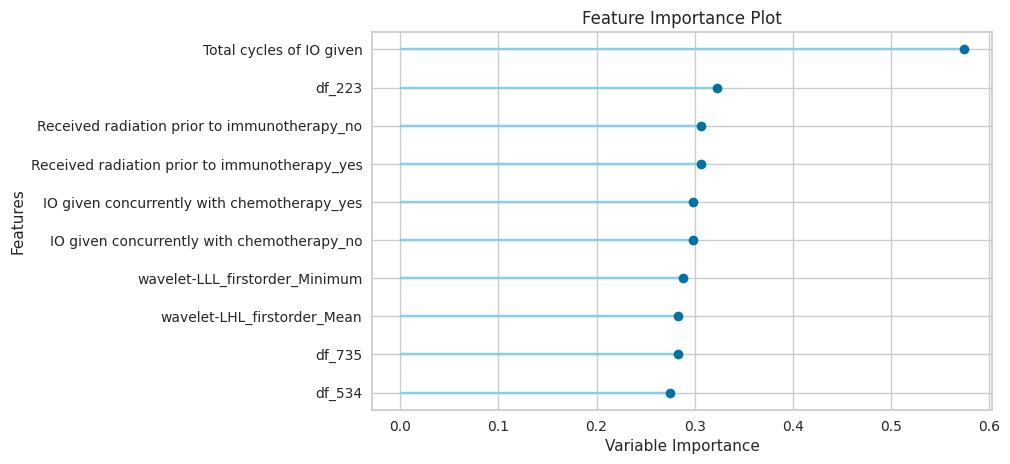

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)


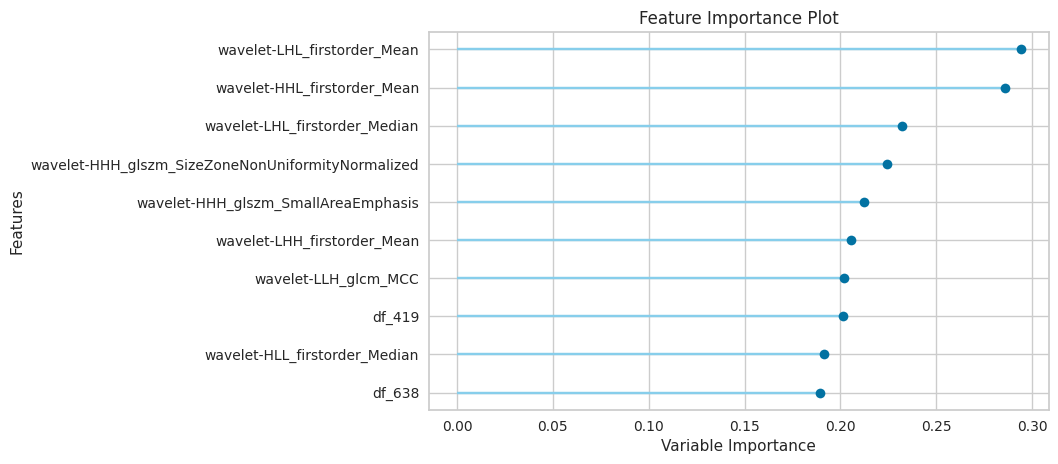

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [158]:
# plot feature importance
for best in best_3:
    try:
        print(best)
        plot_model(best, plot = 'feature')
    except:
        continue     

In [159]:
# interpret summary model
for best in best_3:
    try:
        print(best)
        interpret_model(best, plot = 'summary')
    except:
        continue     

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize='deprecated', positive=False,
                random_state=2, solver='auto', tol=0.001)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


### 4.4.2 Pycaret model with feature selection

In [160]:
s = setup(X_train, target=y_train, fold=5, index=False,train_size=0.98,session_id =random_state,preprocess=False, feature_selection=True)
best_3=compare_models(n_select=4)

,Description,Value
0,Session id,2
1,Target,target
2,Target type,Binary
3,Original data shape,"(64, 1639)"
4,Transformed data shape,"(64, 1639)"
5,Transformed train set shape,"(62, 1639)"
6,Transformed test set shape,"(2, 1639)"
7,Numeric features,1638


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8077,0.8321,0.7464,0.9429,0.8186,0.6298,0.6638,0.1340
lr,Logistic Regression,0.7744,0.8804,0.8464,0.8064,0.8173,0.5222,0.5430,0.1800
ridge,Ridge Classifier,0.7590,0.0000,0.8429,0.7881,0.8126,0.4771,0.4816,0.0660
gbc,Gradient Boosting Classifier,0.7577,0.7558,0.7643,0.8464,0.7994,0.4938,0.5049,0.5120
svm,SVM - Linear Kernel,0.7269,0.0000,0.8000,0.8356,0.7689,0.4239,0.5171,0.0660
ada,Ada Boost Classifier,0.7256,0.8098,0.7179,0.8520,0.7555,0.4490,0.4928,0.2720
dt,Decision Tree Classifier,0.6962,0.7054,0.6607,0.8190,0.7282,0.3872,0.4039,0.0920
et,Extra Trees Classifier,0.6936,0.6993,0.7929,0.7556,0.7597,0.3442,0.3684,0.2980
nb,Naive Bayes,0.6615,0.6279,0.8643,0.6711,0.7540,0.2289,0.2702,0.0860
lightgbm,Light Gradient Boosting Machine,0.6308,0.6596,0.7214,0.7323,0.6987,0.2219,0.2710,4.4520


Processing:   0%|          | 0/64 [00:00<?, ?it/s]

In [161]:
X.columns

Index(['BMI at diagnosis', 'Pack years',
       'ECOG PS at the time of immunotherapy', 'Total cycles of IO given',
       'Age', 'Choice of immunotherapy_atezolizumab',
       'Choice of immunotherapy_combination',
       'Choice of immunotherapy_durvalumab',
       'Choice of immunotherapy_lenvatinib',
       'Choice of immunotherapy_nivolumab',
       ...
       'df_759', 'df_760', 'df_761', 'df_762', 'df_763', 'df_764', 'df_765',
       'df_766', 'df_767', 'df_768'],
      dtype='object', length=1638)

In [162]:
deepdict

{'df_1': {'min': -1543.954439, 'diff': 3883.080229},
 'df_2': {'min': 290.0454354, 'diff': 5226.536500599999},
 'df_3': {'min': -7296.643429, 'diff': 5862.578259},
 'df_4': {'min': 893.9935656, 'diff': 4206.7159904},
 'df_5': {'min': 1519.847301, 'diff': 7675.1623500000005},
 'df_6': {'min': -1405.346897, 'diff': 1703.7778875999998},
 'df_7': {'min': 502.5296707, 'diff': 5789.8967743},
 'df_8': {'min': 1109.480774, 'diff': 7977.028297000001},
 'df_9': {'min': -8191.766205, 'diff': 10528.47114},
 'df_10': {'min': -5050.337446, 'diff': 5499.4850457},
 'df_11': {'min': 2050.712095, 'diff': 11325.071785},
 'df_12': {'min': 727.6291611, 'diff': 9323.7651289},
 'df_13': {'min': -786.5893695, 'diff': 2746.8292245000002},
 'df_14': {'min': -3945.51029, 'diff': 4468.5841515},
 'df_15': {'min': -11535.27759, 'diff': 9810.140658},
 'df_16': {'min': -609.208307, 'diff': 5460.284033},
 'df_17': {'min': 923.5506561, 'diff': 7095.0572019},
 'df_18': {'min': -6698.96051, 'diff': 5966.6050684},
 'df_19

In [163]:
radiodict

{'original_shape_Elongation': {'min': 0.584156171,
  'diff': 0.39870739200000005},
 'original_shape_Flatness': {'min': 0.419681769, 'diff': 0.317969484},
 'original_shape_LeastAxisLength': {'min': 128.5138267, 'diff': 92.0562745},
 'original_shape_MajorAxisLength': {'min': 232.3236785,
  'diff': 142.25254249999998},
 'original_shape_Maximum2DDiameterColumn': {'min': 242.0020661,
  'diff': 180.35441840000001},
 'original_shape_Maximum2DDiameterRow': {'min': 197.4968354,
  'diff': 142.88236489999997},
 'original_shape_Maximum2DDiameterSlice': {'min': 208.8300745,
  'diff': 157.14806690000003},
 'original_shape_Maximum3DDiameter': {'min': 247.3661254,
  'diff': 180.23298590000002},
 'original_shape_MeshVolume': {'min': 1932196.875, 'diff': 5951385.542},
 'original_shape_MinorAxisLength': {'min': 160.5577168,
  'diff': 122.37390530000002},
 'original_shape_Sphericity': {'min': 0.406205518,
  'diff': 0.22957155200000007},
 'original_shape_SurfaceArea': {'min': 172589.3711,
  'diff': 252277.

In [168]:
X

,BMI at diagnosis,Pack years,ECOG PS at the time of immunotherapy,Total cycles of IO given,Age,Choice of immunotherapy_atezolizumab,Choice of immunotherapy_combination,Choice of immunotherapy_durvalumab,Choice of immunotherapy_lenvatinib,Choice of immunotherapy_nivolumab,...,df_759,df_760,df_761,df_762,df_763,df_764,df_765,df_766,df_767,df_768
0,22.63,28.0,0,14.0,65,0,0,0,0,0,...,0.902241,0.490437,0.318951,0.741134,0.173757,0.327519,0.743257,0.483205,0.153158,0.637859
1,28.30,60.0,1,18.0,76,0,0,0,0,0,...,0.832636,0.622136,0.204647,0.876920,0.134549,0.094940,0.803388,0.860112,0.268269,0.798921
2,24.10,30.0,0,13.0,66,0,0,0,0,0,...,0.458470,0.411284,0.542982,0.616837,0.281103,0.265027,0.543416,0.653212,0.584133,0.560190
3,27.40,88.0,2,13.0,60,0,0,1,0,0,...,0.898763,0.654520,0.510872,0.912625,0.088356,0.273464,0.840079,0.780252,0.180197,0.630141
4,25.40,80.0,1,2.0,61,0,0,0,0,1,...,0.845072,0.905913,0.527045,0.768280,0.106588,0.182365,0.831510,0.527012,0.064225,0.737048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.00,40.0,2,2.0,56,0,0,0,0,0,...,0.844580,0.684632,0.495120,0.765095,0.115304,0.254351,0.748520,0.492700,0.148946,0.681656
85,16.00,40.0,3,2.0,59,0,0,0,1,0,...,0.848279,0.741034,0.539570,0.721886,0.134822,0.278667,0.740427,0.758165,0.171287,0.641080
86,29.00,30.0,2,2.0,77,0,0,0,0,1,...,0.888665,0.901447,0.612882,0.845177,0.077751,0.193641,0.780227,0.684758,0.213245,0.682575
87,25.00,50.0,2,2.0,74,1,0,0,0,0,...,0.899549,0.603542,0.266875,0.932016,0.067613,0.134301,0.901619,0.650298,0.161972,0.729681
